#### Title: Milestone 3
#### Author: Jerock Kalala
#### Date: April 29th 2023
#### Modified By: --
#### EDA (Exploratory Data Analysis)

##### Import Python Libraries

In [247]:
#Import libraries
import numpy as np
import pandas
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import os
%matplotlib inline

from sklearn.linear_model import LinearRegression, Lasso
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

##### Loading the datasets

In [235]:
data1 = pd.read_csv("E:\\Bellevue\\Spring_2023\\DSC410_Predictive Analytics\\Project\\Walmart\\Historical Product Demand.csv")
data_store= pd.read_csv("E:\\Bellevue\\Spring_2023\\DSC410_Predictive Analytics\\Project\\Walmart\\stores.csv")
data_train= pd.read_csv("E:\\Bellevue\\Spring_2023\\DSC410_Predictive Analytics\\Project\\Walmart\\train.csv")
data_test= pd.read_csv("E:\\Bellevue\\Spring_2023\\DSC410_Predictive Analytics\\Project\\Walmart\\test.csv")
data_features= pd.read_csv("E:\\Bellevue\\Spring_2023\\DSC410_Predictive Analytics\\Project\\Walmart\\features.csv")

##### Analyse the data

In [236]:
print(data_store.head())
print("\n", data_store.head())
print("\n", data_test.head())
print("\n", data_features.head())

   Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875

    Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875

    Store  Dept        Date  IsHoliday
0      1     1  2012-11-02      False
1      1     1  2012-11-09      False
2      1     1  2012-11-16      False
3      1     1  2012-11-23       True
4      1     1  2012-11-30      False

    Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0

In [237]:
#Let's check the size fo each dataset
print(data_store.shape)
print(data_train.shape)
print(data_test.shape)
print(data_features.shape)

#Let's check the data type
#data_train.info()

(45, 3)
(421570, 5)
(115064, 4)
(8190, 12)


#Merging the datasets (3)

In [249]:
data = data_train.merge(data_features, on=['Store', 'Date'], how='inner').merge(data_store, on=['Store'], how='inner')
print(data.shape)
data.head(5)

(421570, 17)


,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315


In [250]:
data['ln_Weekly_Sales'] = np.log(data.Weekly_Sales)

C:\Users\jeroc\Python\Python310\lib\site-packages\pandas\core\arraylike.py:405: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\jeroc\Python\Python310\lib\site-packages\pandas\core\arraylike.py:405: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [251]:
#Let's delete duplicate columns and rename other ones from our merged new dataframe
data.drop(['IsHoliday_y'], axis=1,inplace=True) # removing the column
data.rename(columns={'IsHoliday_x':'IsHoliday'},inplace=True) # renaming the column

print("\n", data.shape)
data.head() # last ready data set


 (421570, 17)


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,ln_Weekly_Sales
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,10.123607
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,10.831811
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,9.528075
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,10.595485
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,10.380634


In [257]:
#Let's reduce our dataset by selecting all the week sales greater than 0
data = data.loc[data['Weekly_Sales'] > 0]
data.shape

(420212, 17)

Let's look at the date range in our dataset

In [261]:
print(data['Date'].head(5))
print(data['Date'].tail(5))

0    2010-02-05
1    2010-02-05
2    2010-02-05
3    2010-02-05
4    2010-02-05
Name: Date, dtype: object
421565    2012-10-26
421566    2012-10-26
421567    2012-10-26
421568    2012-10-26
421569    2012-10-26
Name: Date, dtype: object


We have our data from febuary 5th 2010 to October 26th 2012

In [262]:
#Let's get the full info
print(data.info(show_counts= False), "\n")
data.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420212 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Store            int64  
 1   Dept             int64  
 2   Date             object 
 3   Weekly_Sales     float64
 4   IsHoliday        bool   
 5   Temperature      float64
 6   Fuel_Price       float64
 7   MarkDown1        float64
 8   MarkDown2        float64
 9   MarkDown3        float64
 10  MarkDown4        float64
 11  MarkDown5        float64
 12  CPI              float64
 13  Unemployment     float64
 14  Type             object 
 15  Size             int64  
 16  ln_Weekly_Sales  float64
dtypes: bool(1), float64(11), int64(3), object(2)
memory usage: 54.9+ MB
None 



Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size', 'ln_Weekly_Sales'],
      dtype='object')

In [263]:
#changing the Date column datatype
data["Date"] = pd.to_datetime(data["Date"])

In [264]:
#data.set_index('Date', inplace=True) #seting date as index

#Check for unique values in each column

In [265]:
data.nunique()

Store                  45
Dept                   81
Date                  143
Weekly_Sales       358785
IsHoliday               2
Temperature          3528
Fuel_Price            892
MarkDown1            2277
MarkDown2            1499
MarkDown3            1662
MarkDown4            1944
MarkDown5            2293
CPI                  2145
Unemployment          349
Type                    3
Size                   40
ln_Weekly_Sales    358785
dtype: int64

Note: we have 45 stores, 81 departments, ect...

#Missing values Calculation

In [266]:
data.isnull().sum()

Store                   0
Dept                    0
Date                    0
Weekly_Sales            0
IsHoliday               0
Temperature             0
Fuel_Price              0
MarkDown1          270031
MarkDown2          309308
MarkDown3          283561
MarkDown4          285694
MarkDown5          269283
CPI                     0
Unemployment            0
Type                    0
Size                    0
ln_Weekly_Sales         0
dtype: int64

In [267]:
#The below code helps to calculate the percentage of missing values in each column
(data.isnull().sum()/(len(data)))*100

Store               0.000000
Dept                0.000000
Date                0.000000
Weekly_Sales        0.000000
IsHoliday           0.000000
Temperature         0.000000
Fuel_Price          0.000000
MarkDown1          64.260659
MarkDown2          73.607608
MarkDown3          67.480462
MarkDown4          67.988063
MarkDown5          64.082654
CPI                 0.000000
Unemployment        0.000000
Type                0.000000
Size                0.000000
ln_Weekly_Sales     0.000000
dtype: float64

Note: Clearly we see that there are missing values in MarkDowns columns. Because these columns are of type float64, we can replace thr missing values with 0. The business gave markdown columns to see the effect if markdowns on sales.

In [190]:
#Filling null's with 0
df = data.fillna(0)

#Last null check
print(df.isna().sum())
df.shape

Store              0
Dept               0
Date               0
Weekly_Sales       0
IsHoliday          0
Temperature        0
Fuel_Price         0
MarkDown1          0
MarkDown2          0
MarkDown3          0
MarkDown4          0
MarkDown5          0
CPI                0
Unemployment       0
Type               0
Size               0
ln_Weekly_Sales    0
dtype: int64


(421570, 17)

##### Creating new Features

In [268]:
#Let's separate data following their datatype
numeric_data=data.loc[:,((data.dtypes=='int64')|(data.dtypes=='int32')| (data.dtypes=='float64')|(data.dtypes=='float32'))]
categoric_data=data.loc[:, (data.dtypes=='object')]
date_data=data.loc[:,(data.dtypes=='datetime64[ns]')]

print(numeric_data.shape)
print(categoric_data.shape)
print(date_data.shape)

(420212, 14)
(420212, 1)
(420212, 1)


#Introducing a new column,Date features

In [270]:
# We will be extracting day,month and year from Date
data['Day']=pd.DatetimeIndex(date_data['Date']).day
data['Month']=pd.DatetimeIndex(date_data['Date']).month
data['Year']=pd.DatetimeIndex(date_data['Date']).year
print(df.shape)
data.head()

(421570, 25)


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,ln_Weekly_Sales,Day,Month,Year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,10.123607,5,2,2010
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,10.831811,5,2,2010
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,9.528075,5,2,2010
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,10.595485,5,2,2010
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,10.380634,5,2,2010


#Creating new variable

In [271]:
from datetime import datetime
import calendar

def weekend_or_weekday(year,month,day):
	d = datetime(year,month,day)
	if d.weekday()>4:
		return 1
	else:
		return 0
data['Weekend'] = data.apply(lambda x:weekend_or_weekday(x['Year'], x['Month'], x['Day']), axis=1)
data.Weekend = data.Weekend.astype(bool)
data.head()


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,MarkDown5,CPI,Unemployment,Type,Size,ln_Weekly_Sales,Day,Month,Year,Weekend
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,...,NaN,211.096358,8.106,A,151315,10.123607,5,2,2010,False
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,...,NaN,211.096358,8.106,A,151315,10.831811,5,2,2010,False
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,...,NaN,211.096358,8.106,A,151315,9.528075,5,2,2010,False
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,...,NaN,211.096358,8.106,A,151315,10.595485,5,2,2010,False
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,...,NaN,211.096358,8.106,A,151315,10.380634,5,2,2010,False


In [274]:
#Creating new variable
from datetime import datetime
df_model=data.copy()
n=np.where
d=data['Date']

data['Super_Bowl']=n((d==datetime(2010,2,12))|(d==datetime(2011,2,11))|(d==datetime(2012,2,10))|(d==datetime(2013,2,8)),1,0)
data['Labor_Day']=n((d==datetime(2010,9,10))|(d==datetime(2011,9,9))|(d==datetime(2012,9,7))|(d==datetime(2013,9,6)),1,0)
data['Thanksgiving']=n((d==datetime(2010,11,26))|(d==datetime(2011,11,25))|(d==datetime(2012,11,23))|(d==datetime(2013,11,29)),1,0)
data['Christmas']=n((d==datetime(2010,12,31))|(d==datetime(2011,12,30))|(d==datetime(2012,12,28))|(d==datetime(2013,12,27)),1,0)
data_holy = data[['Super_Bowl', 'Labor_Day','Thanksgiving', 'Christmas', 'Weekend']]
print(data.shape)
print(data_holy.shape)
data.head()


(420212, 25)
(420212, 5)


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Size,ln_Weekly_Sales,Day,Month,Year,Weekend,Super_Bowl,Labor_Day,Thanksgiving,Christmas
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,...,151315,10.123607,5,2,2010,False,0,0,0,0
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,...,151315,10.831811,5,2,2010,False,0,0,0,0
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,...,151315,9.528075,5,2,2010,False,0,0,0,0
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,...,151315,10.595485,5,2,2010,False,0,0,0,0
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,...,151315,10.380634,5,2,2010,False,0,0,0,0


In [275]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420212 entries, 0 to 421569
Data columns (total 25 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Store            420212 non-null  int64         
 1   Dept             420212 non-null  int64         
 2   Date             420212 non-null  datetime64[ns]
 3   Weekly_Sales     420212 non-null  float64       
 4   IsHoliday        420212 non-null  bool          
 5   Temperature      420212 non-null  float64       
 6   Fuel_Price       420212 non-null  float64       
 7   MarkDown1        150181 non-null  float64       
 8   MarkDown2        110904 non-null  float64       
 9   MarkDown3        136651 non-null  float64       
 10  MarkDown4        134518 non-null  float64       
 11  MarkDown5        150929 non-null  float64       
 12  CPI              420212 non-null  float64       
 13  Unemployment     420212 non-null  float64       
 14  Type             420

#### Exploratory Data Analysis

- Statistics Summary

In [276]:
df = data.copy()
df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,Unemployment,Size,ln_Weekly_Sales,Day,Month,Year,Super_Bowl,Labor_Day,Thanksgiving,Christmas
count,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,150181.000000,110904.000000,136651.000000,134518.000000,150929.000000,...,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000
mean,22.195611,44.241309,16033.114591,60.090599,3.360890,7247.821269,3330.146158,1441.736203,3384.782267,4629.531870,...,7.960000,136749.732787,8.520815,15.673903,6.449866,2010.968454,0.021116,0.021018,0.014150,0.014062
std,12.787236,30.508819,22729.492116,18.447857,0.458519,8293.028741,9460.395025,9631.968459,6295.136952,5960.171711,...,1.863879,60993.084568,2.049011,8.752818,3.243397,0.796898,0.143770,0.143444,0.118109,0.117747
min,1.000000,1.000000,0.010000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,...,3.879000,34875.000000,-4.605170,1.000000,1.000000,2010.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,18.000000,2120.130000,46.680000,2.933000,2240.270000,41.600000,5.100000,504.220000,1878.440000,...,6.891000,93638.000000,7.659233,8.000000,4.000000,2010.000000,0.000000,0.000000,0.000000,0.000000
50%,22.000000,37.000000,7661.700000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,...,7.866000,140167.000000,8.943989,16.000000,6.000000,2011.000000,0.000000,0.000000,0.000000,0.000000
75%,33.000000,74.000000,20271.265000,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,...,8.567000,202505.000000,9.916960,23.000000,9.000000,2012.000000,0.000000,0.000000,0.000000,0.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,...,14.313000,219622.000000,13.448929,31.000000,12.000000,2012.000000,1.000000,1.000000,1.000000,1.000000


In [66]:
df.describe(include='all').T

C:\Users\jeroc\AppData\Local\Temp\ipykernel_17572\1410410848.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all').T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
Store,421570.0,NaN,NaN,NaN,NaT,NaT,22.200546,12.785297,1.0,11.0,22.0,33.0,45.0
Dept,421570.0,NaN,NaN,NaN,NaT,NaT,44.260317,30.492054,1.0,18.0,37.0,74.0,99.0
Date,421570,143,2011-12-23 00:00:00,3027,2010-02-05,2012-10-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Weekly_Sales,421570.0,NaN,NaN,NaN,NaT,NaT,15981.258123,22711.183519,-4988.94,2079.65,7612.03,20205.8525,693099.36
IsHoliday,421570,2,False,391909,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,421570.0,NaN,NaN,NaN,NaT,NaT,60.090059,18.447931,-2.06,46.68,62.09,74.28,100.14
Fuel_Price,421570.0,NaN,NaN,NaN,NaT,NaT,3.361027,0.458515,2.472,2.933,3.452,3.738,4.468
MarkDown1,421570.0,NaN,NaN,NaN,NaT,NaT,2590.074819,6052.385934,0.0,0.0,0.0,2809.05,88646.76
MarkDown2,421570.0,NaN,NaN,NaN,NaT,NaT,879.974298,5084.538801,-265.76,0.0,0.0,2.2,104519.54
MarkDown3,421570.0,NaN,NaN,NaN,NaT,NaT,468.087665,5528.873453,-29.1,0.0,0.0,4.54,141630.61


In [67]:
#Let's check how many departments and stores are in our dataset
print("The data set has:", df['Store'].nunique(), "stores")
print("and", df['Dept'].nunique(), "departments")

The data set has: 45 stores
and 81 departments


Let's look at the average weekly sales by store and by department in order. Recall, there are 45 stores and 81 departments for stores.

In [68]:
store_dept_look = pd.pivot_table(df, index='Dept', columns='Store',
                                  values='Weekly_Sales', aggfunc=np.mean)
display(store_dept_look)

Store,1,2,3,4,5,6,7,8,9,10,...,36,37,38,39,40,41,42,43,44,45
Dept,,,,,,,,,,,,,,,,,,,,,
1,22513.322937,30777.980769,7328.621049,36979.940070,9774.553077,23867.553776,9542.801259,14789.827343,11846.558252,39925.138951,...,2239.227413,11024.235874,6923.538531,21925.021189,18794.578811,23205.259930,10375.148392,7549.109021,8049.992308,17745.916014
2,46102.090420,65912.922517,16841.775664,93639.315385,12317.953287,50269.437273,22603.690769,35729.821748,24969.477413,109795.291469,...,13416.025664,16511.446224,10986.172657,67338.429371,26702.705175,48349.828951,15976.902448,20722.851469,9377.273007,35800.912448
3,13150.478042,17476.563357,5509.300769,19012.491678,4101.085175,16806.638811,8633.536923,10683.305105,7497.356783,32086.181469,...,381.324266,1297.862028,498.700210,20569.701608,6489.030350,17021.833357,814.451189,999.648881,571.016713,9508.014965
4,36964.154476,45607.666573,8434.186503,56603.400140,9860.806783,34187.366503,14950.518601,21089.309301,17165.947762,48579.826364,...,9873.505105,17614.013636,10669.501329,44807.515105,24386.750559,30538.574895,14885.264755,18227.382168,7403.959580,24229.873147
5,24257.941119,30555.315315,11695.366573,45668.406783,6699.202238,34465.307622,13860.350490,19838.849231,19282.746014,58373.460280,...,314.753982,1137.631189,397.418322,24043.436783,17689.671678,25513.943776,1052.296783,575.417326,960.670490,16107.063077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,120772.062168,143588.751888,15745.528252,147236.473706,19340.693986,89208.786294,34208.097273,62951.463706,29575.050769,73344.654685,...,39735.688741,51410.551119,41793.649021,103036.757133,66572.881259,88666.468392,61205.272308,72883.223287,31100.185175,52896.166643
96,33251.831639,34319.063846,3934.540000,38346.573077,5985.671119,30450.542238,1123.383217,16.986667,3596.107762,11079.676643,...,15683.341818,20375.380769,11981.676643,27089.158601,15309.077972,2883.492238,15183.474196,25058.369371,2834.139580,2.970000
97,35207.348811,40697.204056,343.437357,39339.238951,667.070315,20637.667063,4374.927902,16978.366503,372.655556,5323.506503,...,6469.273636,13960.701399,9902.368182,23993.406853,17131.033497,19789.219231,17495.198811,19349.989930,6636.467413,6466.961888


Rows represent the 81 department labeled 1-99 (some numbers are jumped like), columns represent the 45 Stores.

#Lets separate Numerical and categorical variables for easy analysis


-Univariate Analysis

In [69]:
num_var=df.loc[:,((df.dtypes=='int64')|(df.dtypes=='int32')| (df.dtypes=='float64')|(df.dtypes=='float32'))]
cat_var=df.loc[:, (df.dtypes=='object')]
date_var=df.loc[:,(df.dtypes=='datetime64[ns]')]

print("Categorical Variables:")
print(cat_var.shape)
print("\nNumerical Variables:")
print(num_var.shape)
print("\nDate Variables:")
print(date_var.shape)

Categorical Variables:
(421570, 1)

Numerical Variables:
(421570, 21)

Date Variables:
(421570, 1)


In [131]:
#Let's drop some columns
num_cols1 = df[['Store', 'Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].copy()

C:\Users\jeroc\AppData\Local\Temp\ipykernel_17572\206123842.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Weekly_Sales)


<AxesSubplot: xlabel='Weekly_Sales', ylabel='Density'>

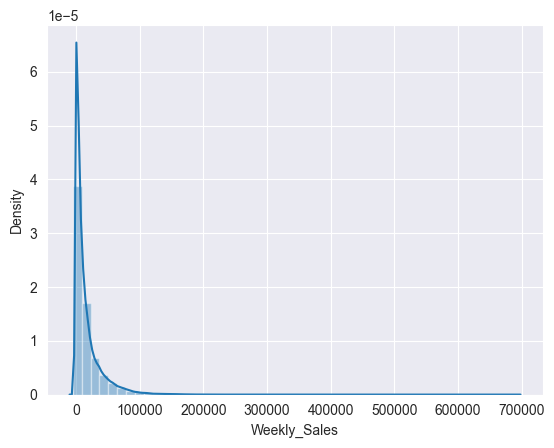

In [71]:
## Y should be normal.
df.Weekly_Sales.sum()
sns.distplot(df.Weekly_Sales)

In [132]:
holyday = ['Super_Bowl', 'Labor_Day','Thanksgiving', 'Christmas', 'Weekend']

#let's compare sales during holiday and the rest of the day

<AxesSubplot: xlabel='IsHoliday', ylabel='Weekly_Sales'>

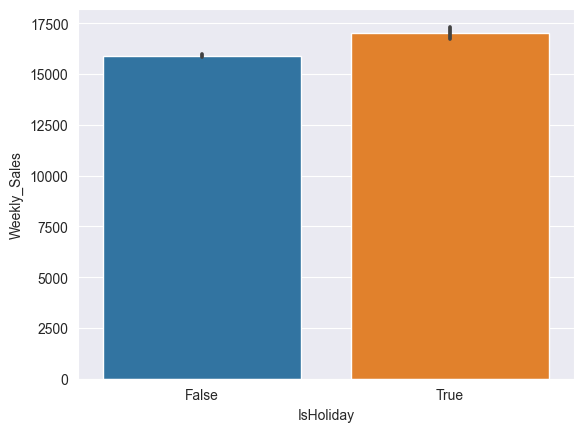

In [73]:
 #let's compare sales during holiday and the rest of the day
sns.barplot(x='IsHoliday', y='Weekly_Sales', data=df) # Holiday vs not-Holiday

Let's see the correlation between features (X) and the target (Y)

In [133]:
#There must be a relation between X and Y
corr=df.corr()
corr

C:\Users\jeroc\AppData\Local\Temp\ipykernel_17572\817496754.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,Size,ln_Weekly_Sales,Day,Month,Year,Weekend,Super_Bowl,Labor_Day,Thanksgiving,Christmas
Store,1.000000,0.024004,-0.085195,-0.000548,-0.050097,0.065290,-0.059844,-0.033829,-0.020331,-0.042724,...,-0.182881,-0.132680,-0.000015,0.001011,0.002997,NaN,-0.000805,0.000299,-0.000333,-0.000237
Dept,0.024004,1.000000,0.148032,0.000916,0.004437,0.003572,0.001494,0.000587,0.001475,0.001937,...,-0.002966,0.018503,-0.000678,0.000904,0.003738,NaN,0.000590,-0.000083,0.000940,0.000428
Weekly_Sales,-0.085195,0.148032,1.000000,0.012774,-0.002312,-0.000120,0.047172,0.020716,0.038562,0.037467,...,0.243828,0.635579,-0.006187,0.028409,-0.010111,NaN,0.002565,-0.000642,0.032898,-0.007573
IsHoliday,-0.000548,0.000916,0.012774,1.000000,-0.155949,-0.078281,-0.003521,0.207604,0.266471,0.011565,...,0.000593,0.005250,0.045465,0.123376,-0.056746,NaN,0.533665,0.532622,0.435254,0.434772
Temperature,-0.050097,0.004437,-0.002312,-0.155949,1.000000,0.143859,-0.026415,-0.179672,-0.056026,-0.050281,...,-0.058313,-0.040312,0.026832,0.235983,0.065814,NaN,-0.202030,0.111805,-0.076920,-0.151004
Fuel_Price,0.065290,0.003572,-0.000120,-0.078281,0.143859,1.000000,0.297056,0.029153,0.018615,0.166622,...,0.003361,-0.007090,0.028058,-0.040876,0.779633,NaN,-0.076502,0.018164,-0.047075,-0.051511
MarkDown1,-0.059844,0.001494,0.047172,-0.003521,-0.026415,0.297056,1.000000,0.174868,-0.014411,0.838904,...,0.169788,0.062053,-0.126187,-0.089206,0.501044,NaN,0.029568,0.009934,-0.045449,-0.010258
MarkDown2,-0.033829,0.000587,0.020716,0.207604,-0.179672,0.029153,0.174868,1.000000,-0.006080,0.113250,...,0.078372,0.027829,0.051971,-0.019360,0.131867,NaN,0.019222,-0.025104,-0.018636,0.476022
MarkDown3,-0.020331,0.001475,0.038562,0.266471,-0.056026,0.018615,-0.014411,-0.006080,1.000000,-0.012020,...,0.033641,0.025283,0.072156,0.116031,0.006789,NaN,-0.011764,-0.011725,0.614216,-0.008350
MarkDown4,-0.042724,0.001937,0.037467,0.011565,-0.050281,0.166622,0.838904,0.113250,-0.012020,1.000000,...,0.127334,0.045672,-0.152753,-0.105569,0.335340,NaN,0.080710,-0.015154,-0.032397,-0.022417


In [134]:
def desc_num_feature(feature_name, bins=30, edgecolor='k', **kwargs):
    fig, ax = plt.subplots(figsize=(8,4))
    df[feature_name].hist(bins=bins, edgecolor=edgecolor, ax=ax, **kwargs)
    ax.set_title(feature_name, size=15)
    plt.figtext(1,0.15, str(df[feature_name].describe().round(2).astype(str)), size=17)

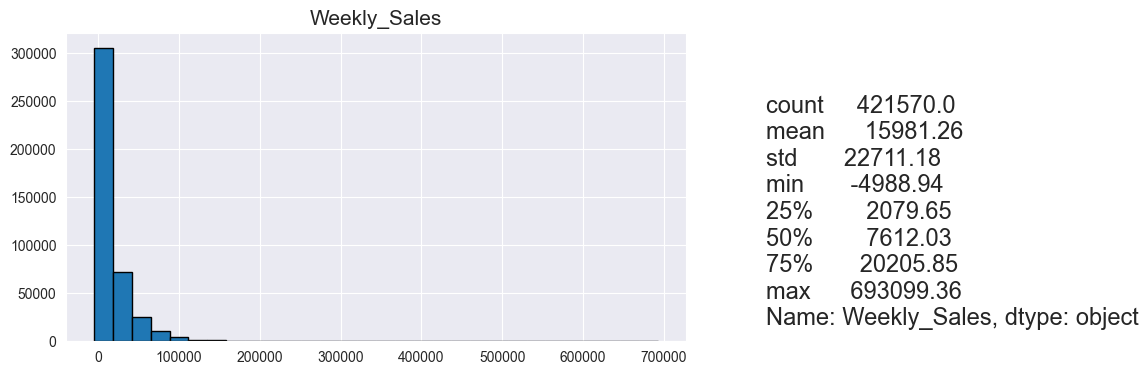

In [77]:
desc_num_feature('Weekly_Sales')

#We also evaluate distribution kurtosis and asymmetry:

In [135]:
print(f"Skewness: {df['Weekly_Sales'].skew()}")
print(f"Kurtosis: {df['Weekly_Sales'].kurt()}")

Skewness: 3.262008185465662
Kurtosis: 21.491289908326177


In [79]:
#we can do it for all the rest, but let's skip it for now
#for x in num_cols1:
 #   desc_num_feature(x)
  #  print(f"Skewness: {x.skew()}")
   # print(f"Kurtosis: {x.kurt()}")
    #plt.savefig('line3_plot.pdf')

From this information we see how the distribution:
-does not follow a normal curve
-show spikes
-has kurtosis and asymmetry values greater than 1
We do this for each variable, and we will have a pseudo-complete descriptive picture of their behavior.
We need this work to fully understand each variable, and unlocks the study of the relationship between variables.

-The following fig, histogram and box plot are used to show the pattern of the variables. Some variables have skewness and outliers.

Store
Skewness : 0.08
Kurtosis : -1.15


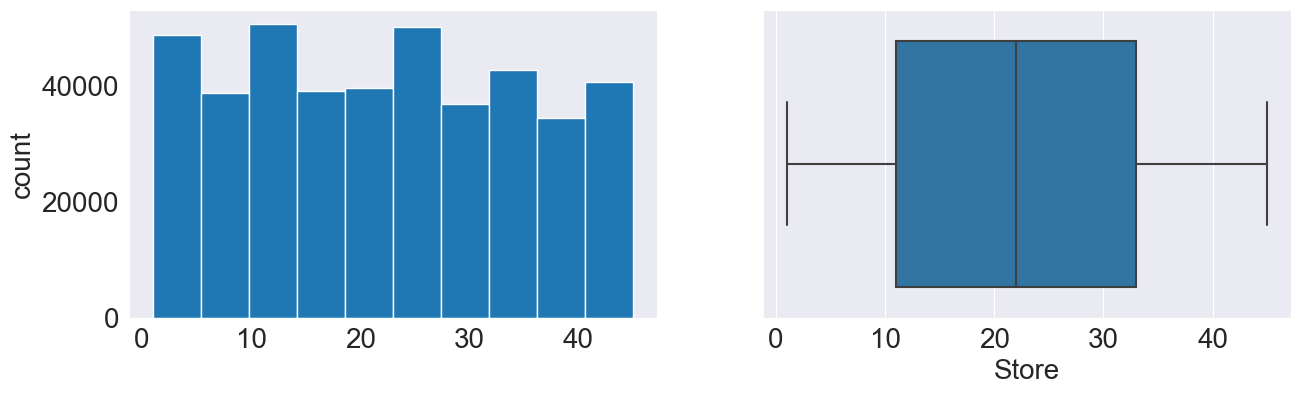

Dept
Skewness : 0.36
Kurtosis : -1.22


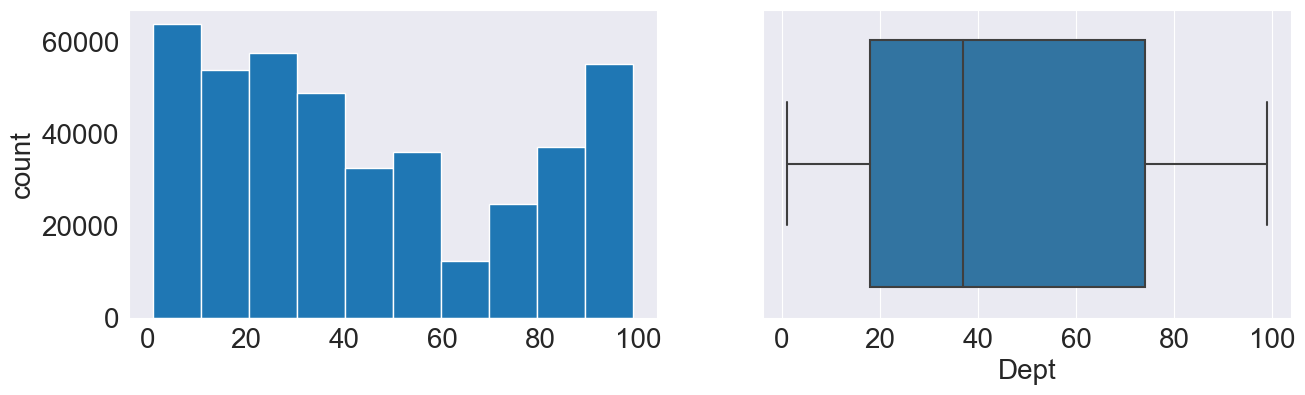

Weekly_Sales
Skewness : 3.26
Kurtosis : 21.49


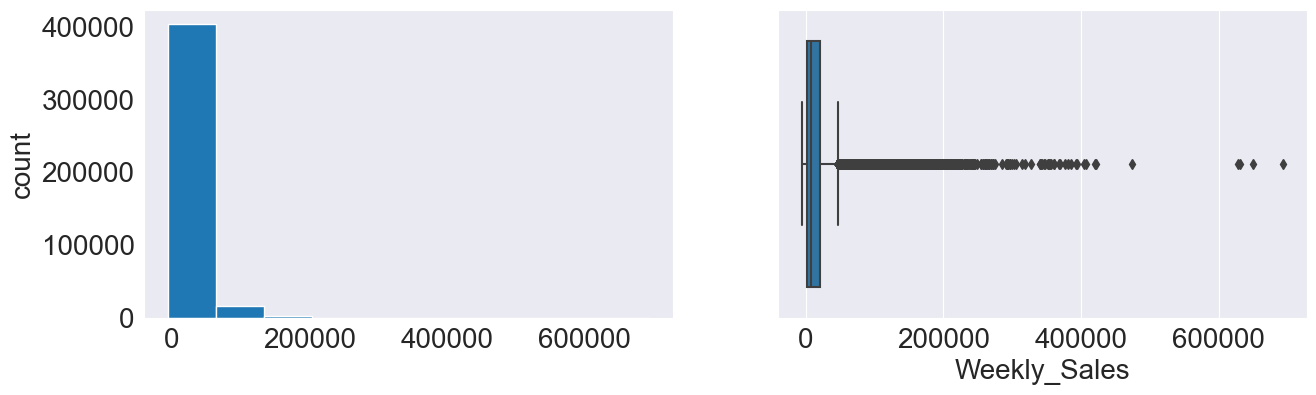

Temperature
Skewness : -0.32
Kurtosis : -0.64


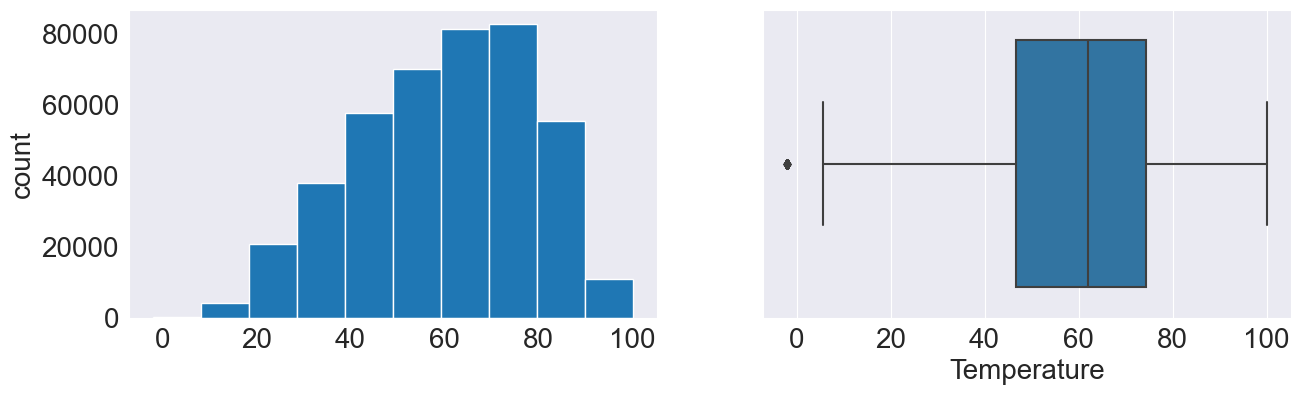

Fuel_Price
Skewness : -0.1
Kurtosis : -1.19


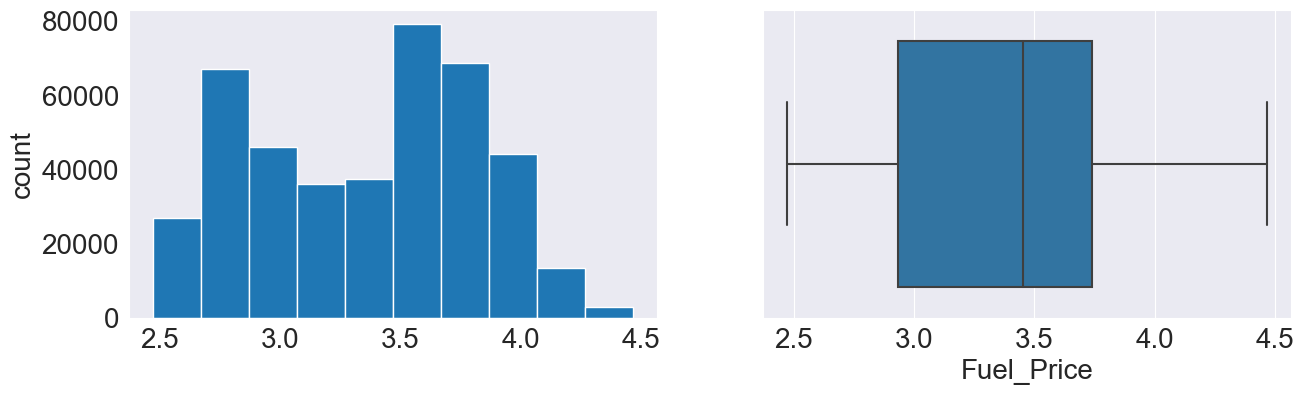

MarkDown1
Skewness : 3.34
Kurtosis : 17.61


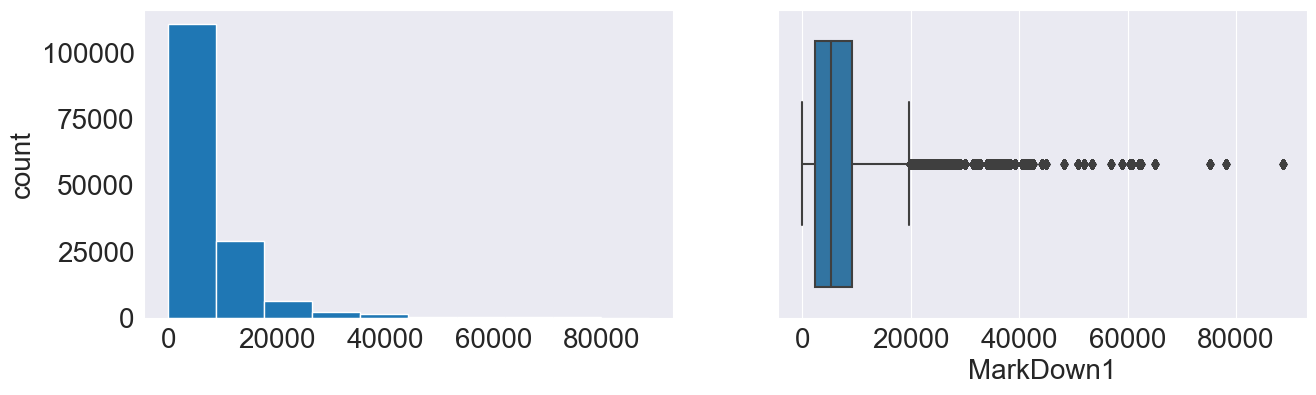

MarkDown2
Skewness : 5.44
Kurtosis : 37.59


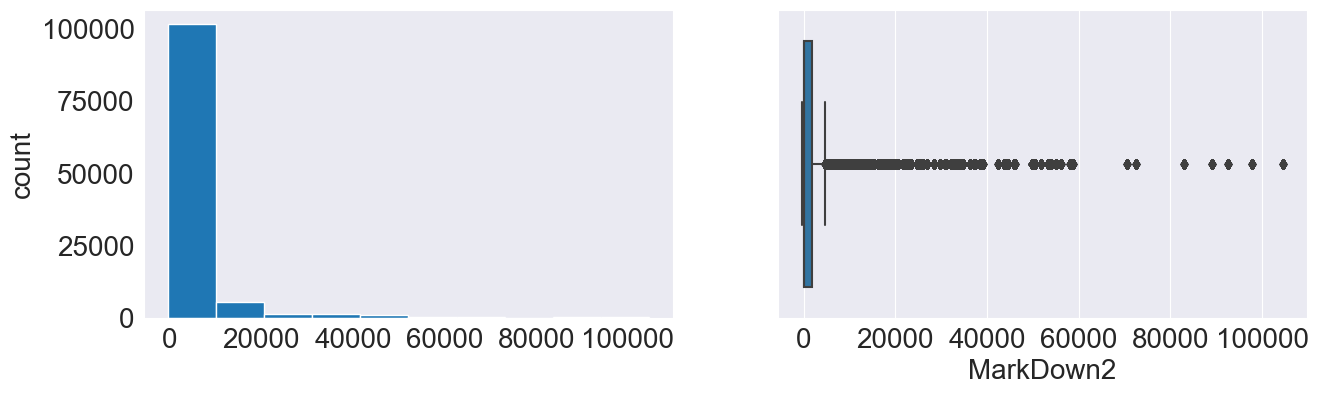

MarkDown3
Skewness : 8.4
Kurtosis : 77.69


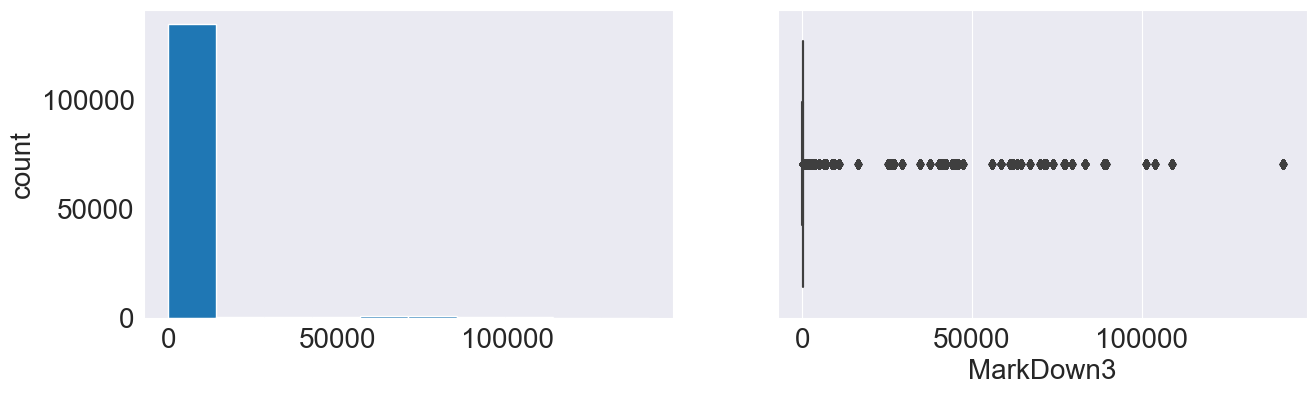

MarkDown4
Skewness : 4.85
Kurtosis : 30.0


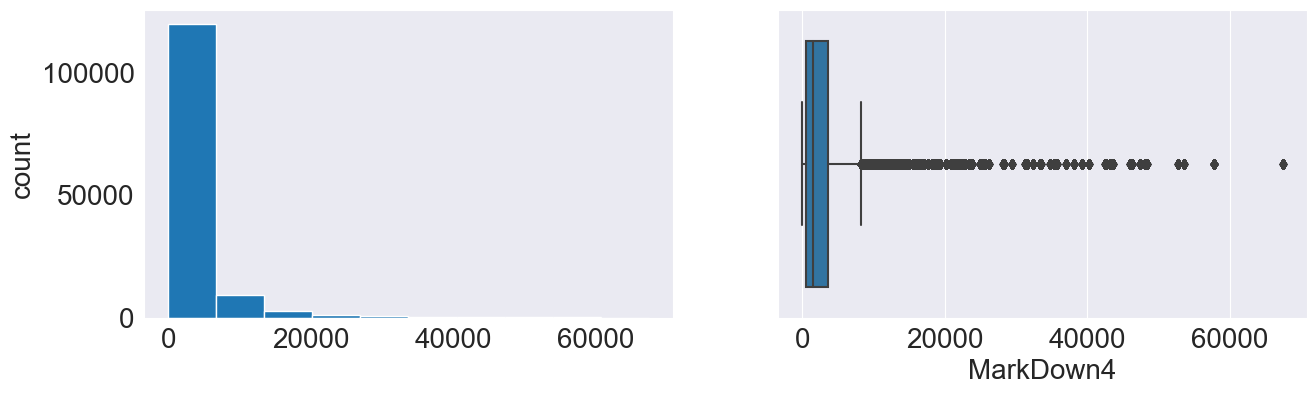

MarkDown5
Skewness : 8.17
Kurtosis : 107.85


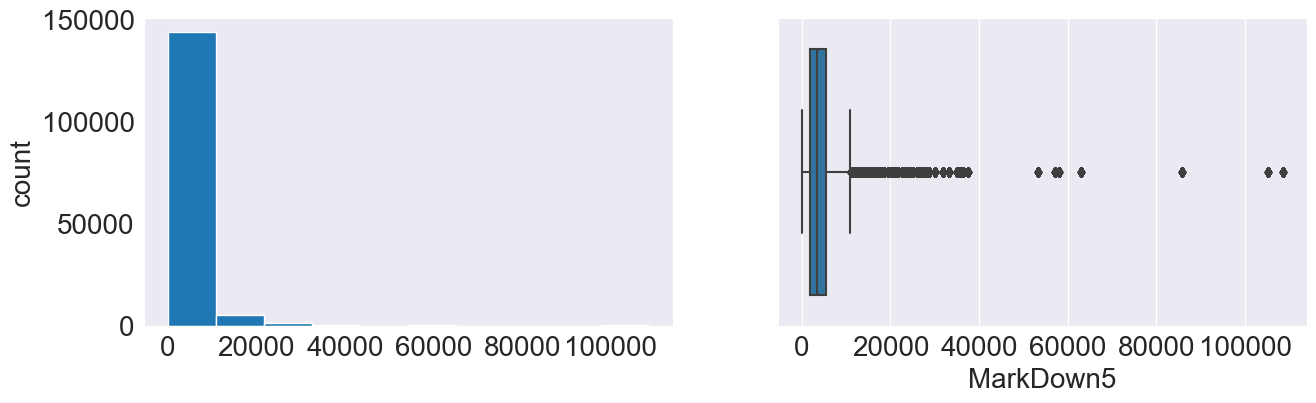

CPI
Skewness : 0.09
Kurtosis : -1.83


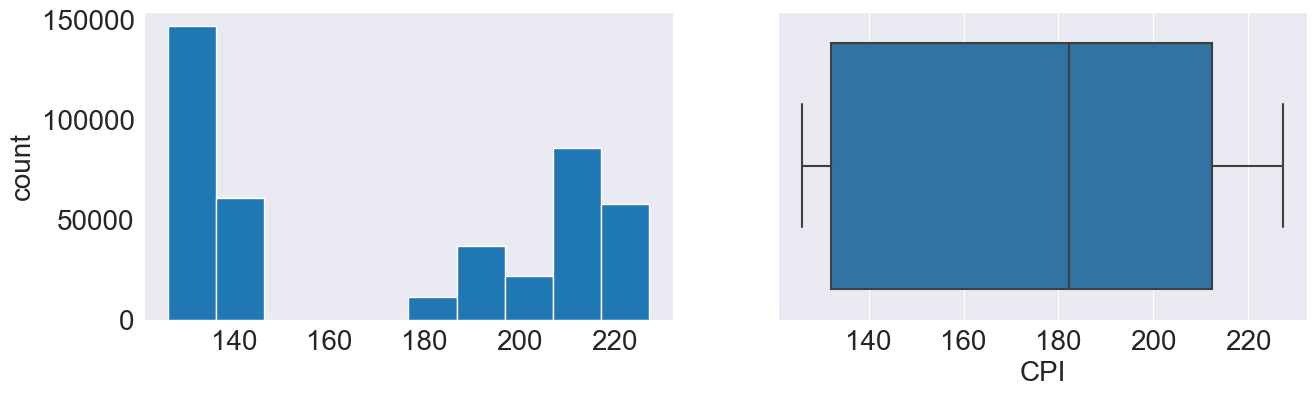

Unemployment
Skewness : 1.18
Kurtosis : 2.73


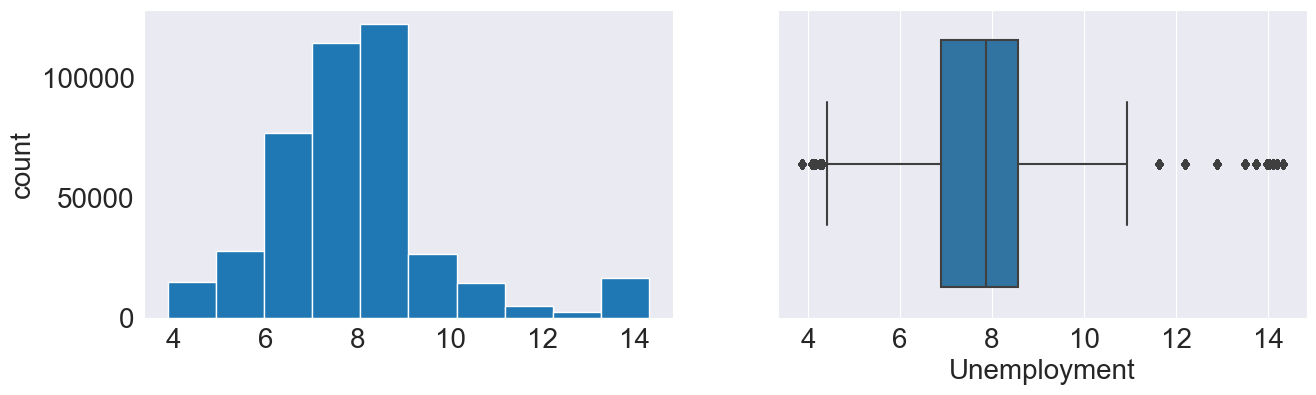

Size
Skewness : -0.33
Kurtosis : -1.21


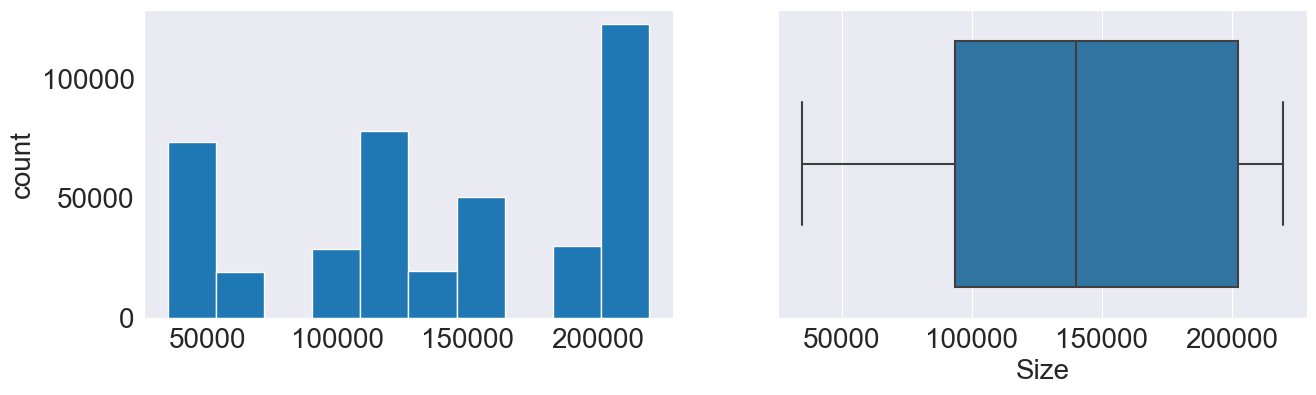

ln_Weekly_Sales
Skewness : nan
Kurtosis : nan


ValueError: supplied range of [-inf, 13.448928644517972] is not finite

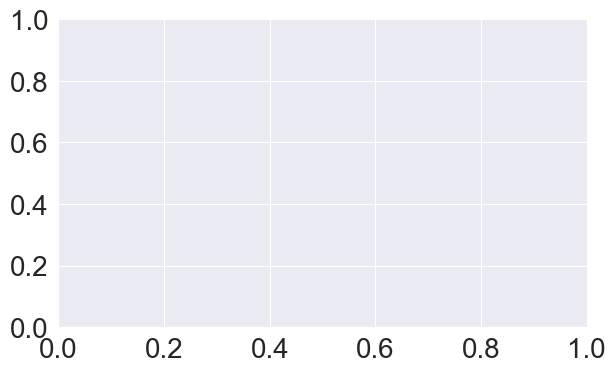

In [87]:
for col in numeric_data:
    print(col)
    print('Skewness :', round(data[col].skew(), 2))
    print('Kurtosis :', round(data[col].kurt(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()

#Categorical variables

In [81]:
#Categorical variables
print(df.Type.value_counts(), "\n")

#Let's express the data as a percentage by passing normalize = True
df.Type.value_counts(normalize=True)

A    215478
B    163495
C     42597
Name: Type, dtype: int64 



A    0.511132
B    0.387824
C    0.101044
Name: Type, dtype: float64

We have 3 type of store in our dataset, and 51% are of the type A.

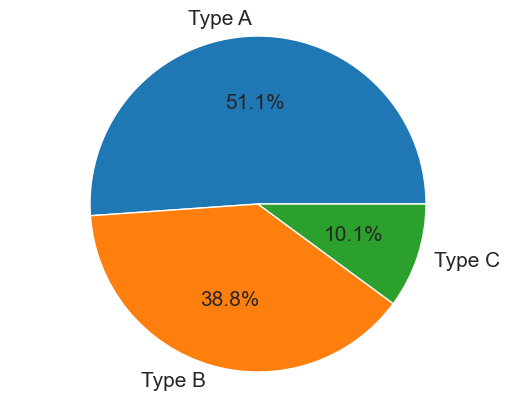

In [83]:
#Let's plot it
my_data = [51.1132, 38.7824 , 10.1044 ]  #percentages
my_labels = 'Type A','Type B', 'Type C' # labels
plt.pie(my_data,labels=my_labels,autopct='%1.1f%%', textprops={'fontsize': 15}) #plot pie type and bigger the labels
plt.axis('equal')
mpl.rcParams.update({'font.size': 20}) #bigger percentage labels

plt.show()

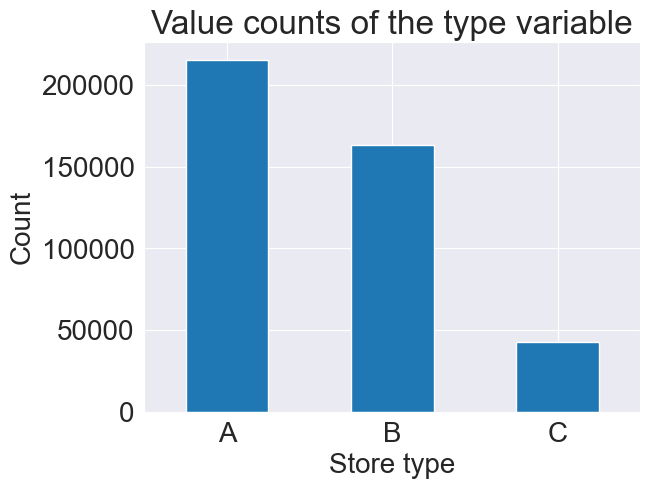

In [88]:
#We can also plot with
df.Type.value_counts().plot(kind="bar")
plt.title("Value counts of the type variable")
plt.xlabel("Store type")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

Type of Store and holyday sales

In [89]:
# Avg weekly sales for types on Christmas
df.groupby(['Christmas','Type'])['Weekly_Sales'].mean()

Christmas  Type
0          A       20126.297990
           B       12249.152357
           C        9541.691864
1          A       18231.031306
           B       11394.051524
           C        7963.228980
Name: Weekly_Sales, dtype: float64

In [90]:
# Avg weekly sales for types on Labor_Day
df.groupby(['Labor_Day','Type'])['Weekly_Sales'].mean()

Labor_Day  Type
0          A       20102.291095
           B       12241.858749
           C        9512.019024
1          A       19973.219881
           B       12013.482757
           C        9871.225746
Name: Weekly_Sales, dtype: float64

In [91]:
# Avg weekly sales for types on Thanksgiving
df.groupby(['Thanksgiving','Type'])['Weekly_Sales'].mean()

Thanksgiving  Type
0             A       19995.309014
              B       12144.563438
              C        9517.272388
1             A       27370.728296
              B       18661.296519
              C        9679.900152
Name: Weekly_Sales, dtype: float64

In [92]:
# Avg weekly sales for types on Super bowl
df.groupby(['Super_Bowl','Type'])['Weekly_Sales'].mean()

Super_Bowl  Type
0           A       20088.683671
            B       12233.518469
            C        9506.055492
1           A       20603.690832
            B       12401.718198
            C       10156.204711
Name: Weekly_Sales, dtype: float64

Let's plot it

C:\Users\jeroc\AppData\Local\Temp\ipykernel_17572\442456931.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


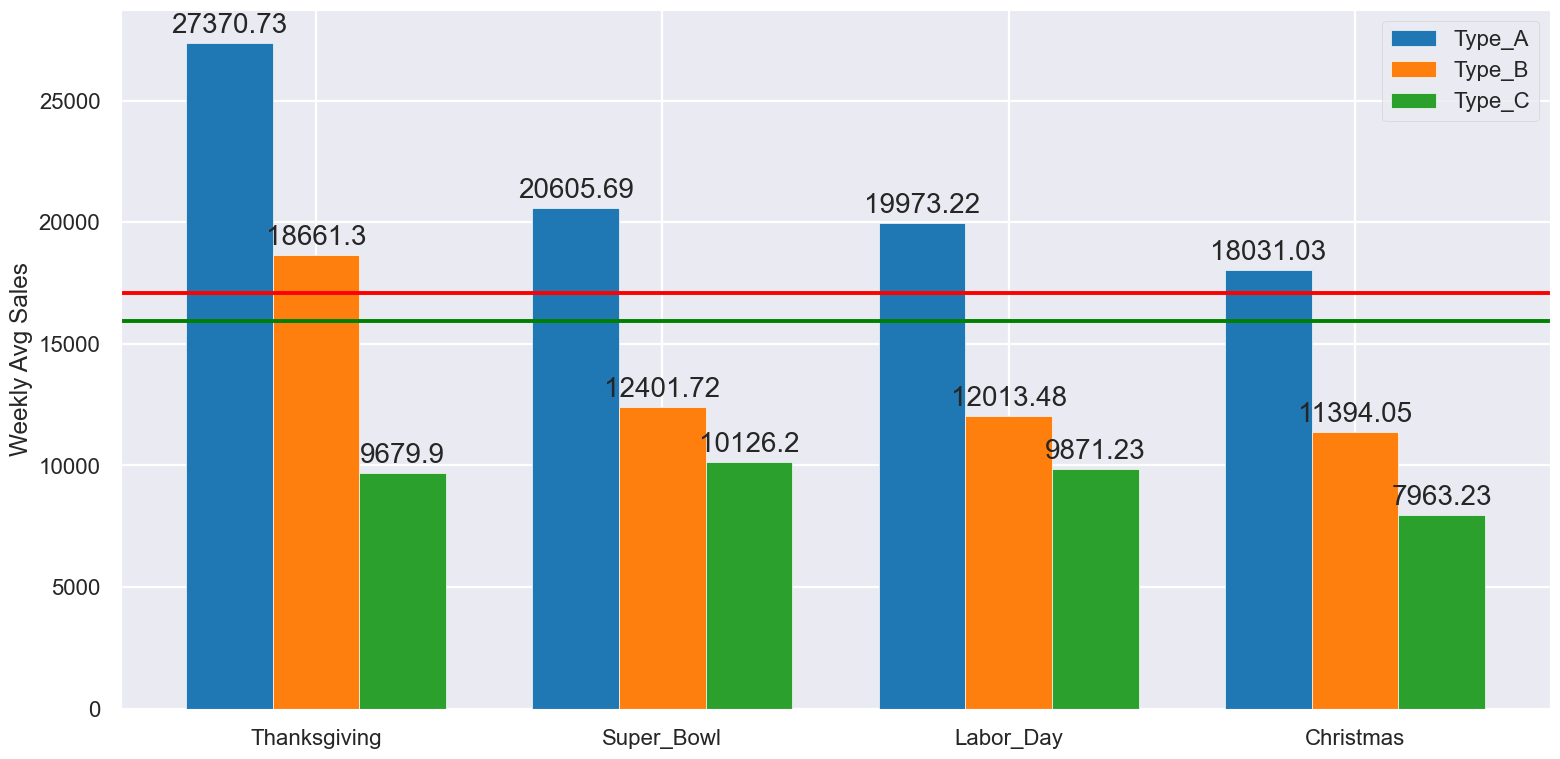

In [93]:
# Plotting avg wekkly sales according to holidays by types
plt.style.use('seaborn-poster')
labels = ['Thanksgiving', 'Super_Bowl', 'Labor_Day', 'Christmas']
A_means = [27370.73, 20605.69, 19973.22, 18031.03]
B_means = [18661.30, 12401.72, 12013.48, 11394.05]
C_means = [9679.90,10126.20,9871.23,7963.23]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(16, 8))
rects1 = ax.bar(x - width, A_means, width, label='Type_A')
rects2 = ax.bar(x , B_means, width, label='Type_B')
rects3 = ax.bar(x + width, C_means, width, label='Type_C')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Weekly Avg Sales')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.axhline(y=17094.30,color='r') # holidays avg
plt.axhline(y=15952.82,color='green') # not-holiday avg

fig.tight_layout()

plt.show()

From the above graph we notice that:
- the highest sale average is during the Thanksgiving week between holidays. And,
- for all holidays Type A stores has highest sales

C:\Users\jeroc\AppData\Local\Temp\ipykernel_17572\2944743756.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 3, i + 1)
C:\Users\jeroc\AppData\Local\Temp\ipykernel_17572\2944743756.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(col).mean()['Weekly_Sales'].plot.bar()
C:\Users\jeroc\AppData\Local\Temp\ipykernel_17572\2944743756.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(col).mean()['Weekly_Sales'].plot.bar()
C:\Users\jeroc\AppData

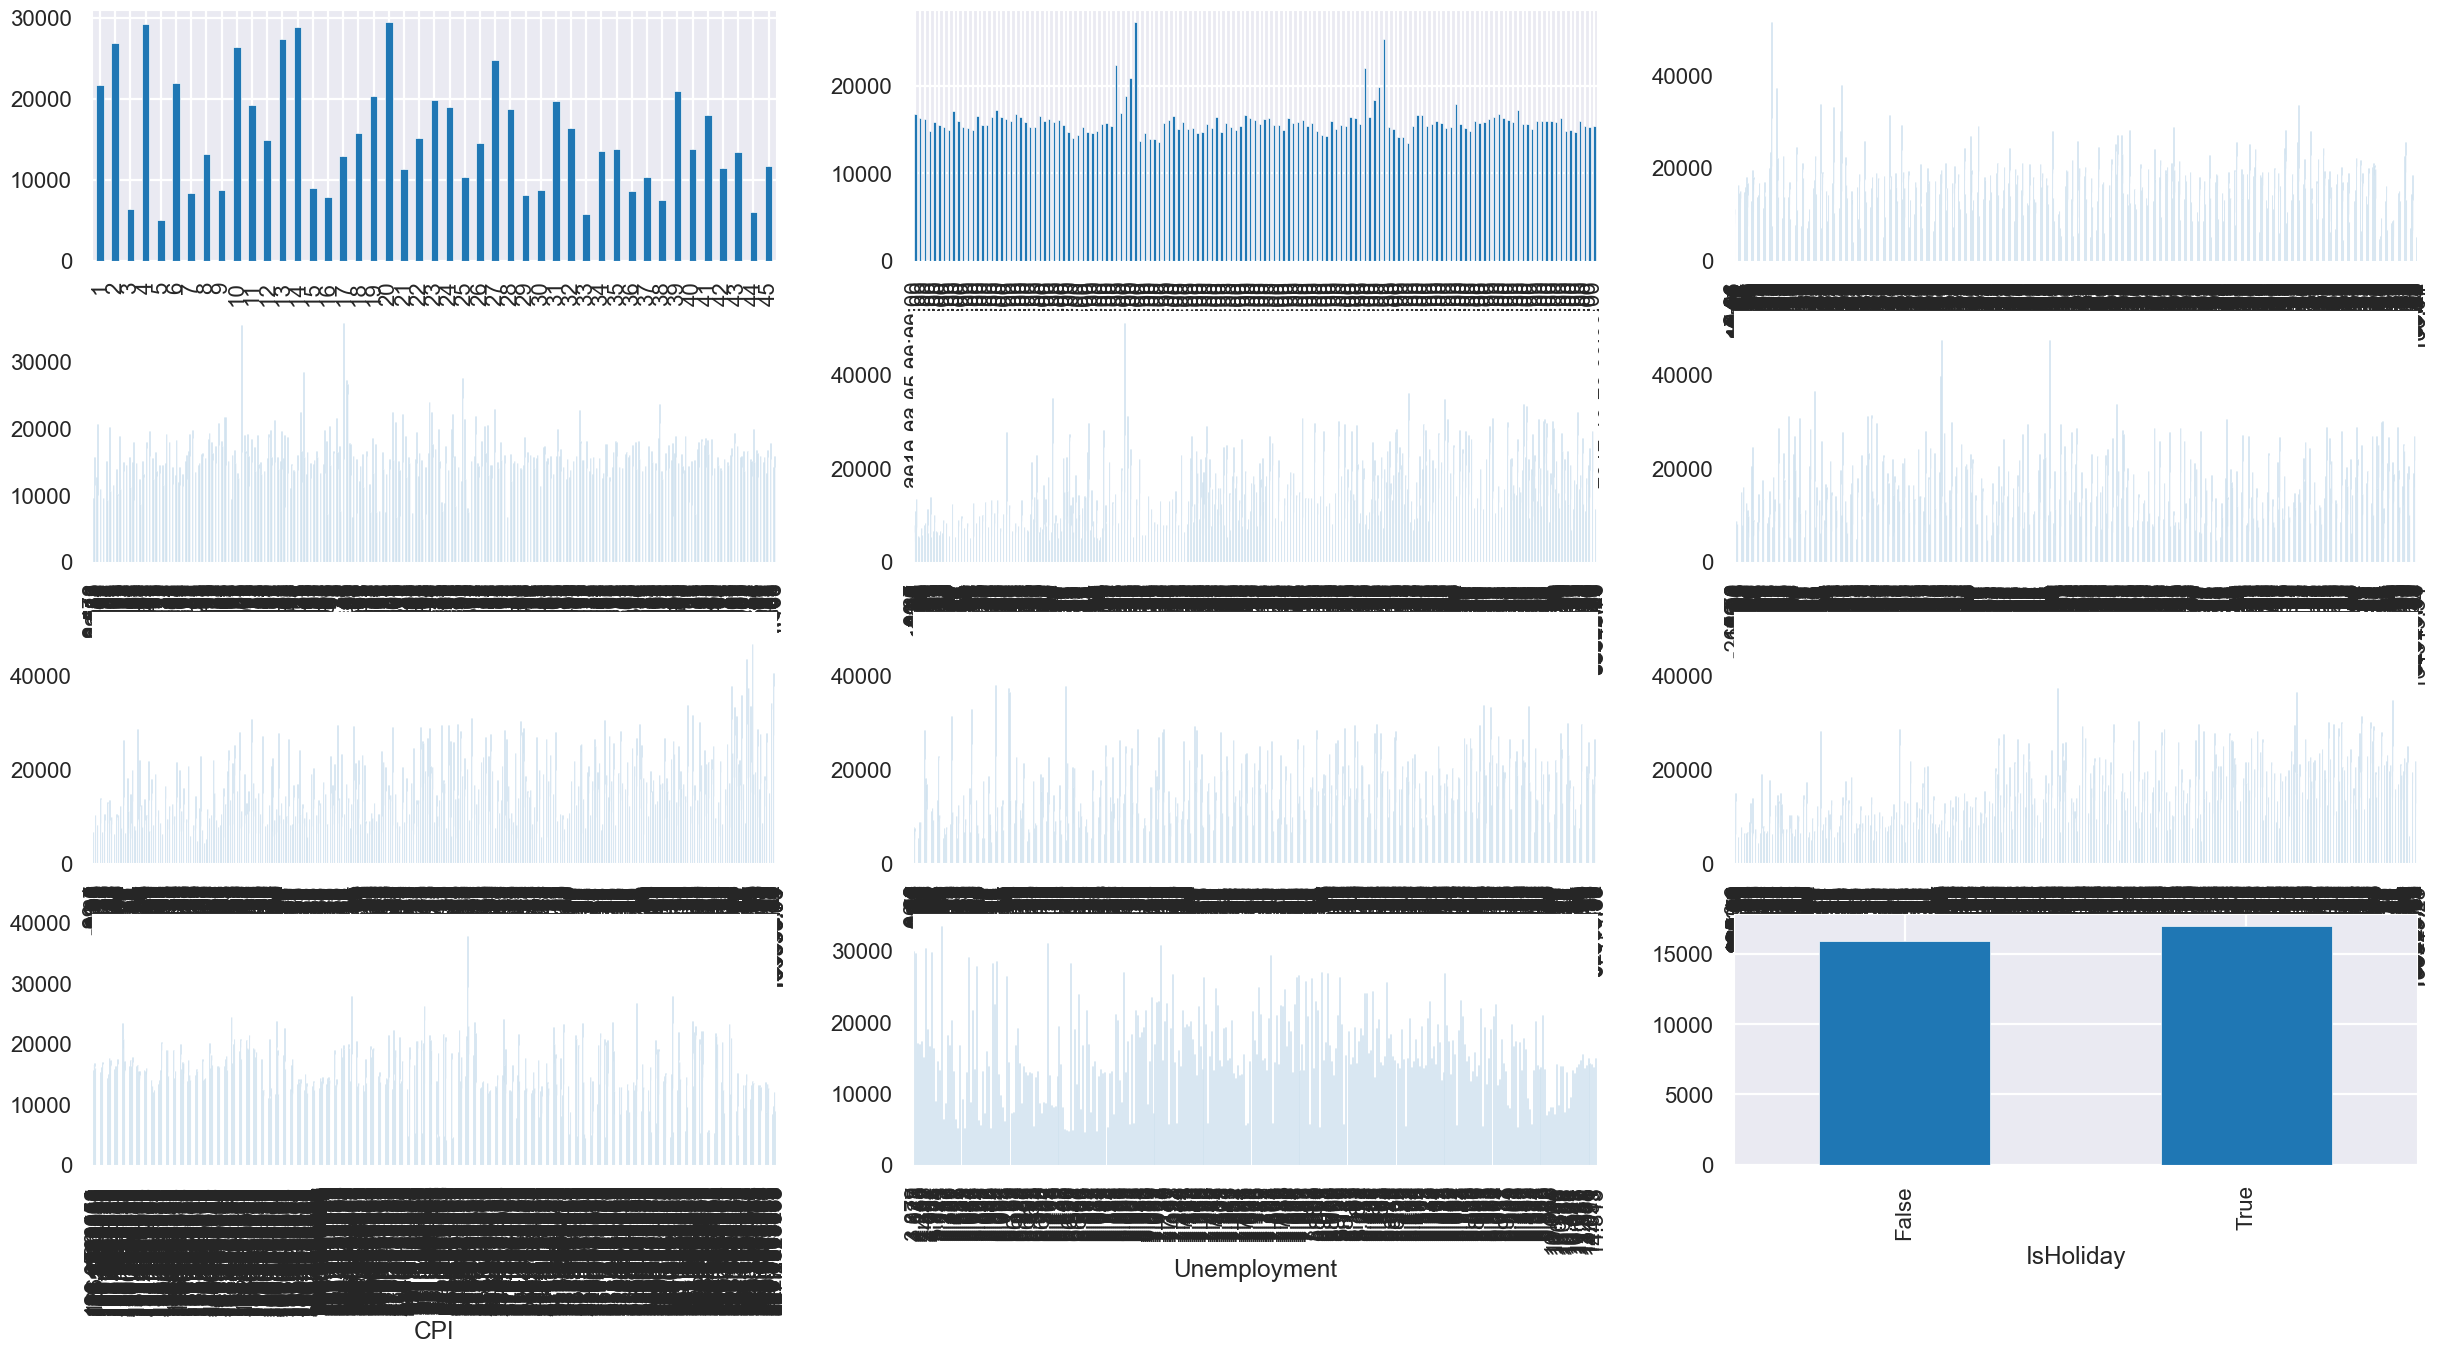

In [94]:
features = df[['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday']].copy()

plt.subplots(figsize=(30, 15))
for i, col in enumerate(features):
	plt.subplot(4, 3, i + 1)
	df.groupby(col).mean()['Weekly_Sales'].plot.bar()
plt.show()

Now let’s check the variation of stock (per day) as the month closes to the end.

C:\Users\jeroc\AppData\Local\Temp\ipykernel_17572\2952623221.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Day').mean()['Weekly_Sales'].plot()


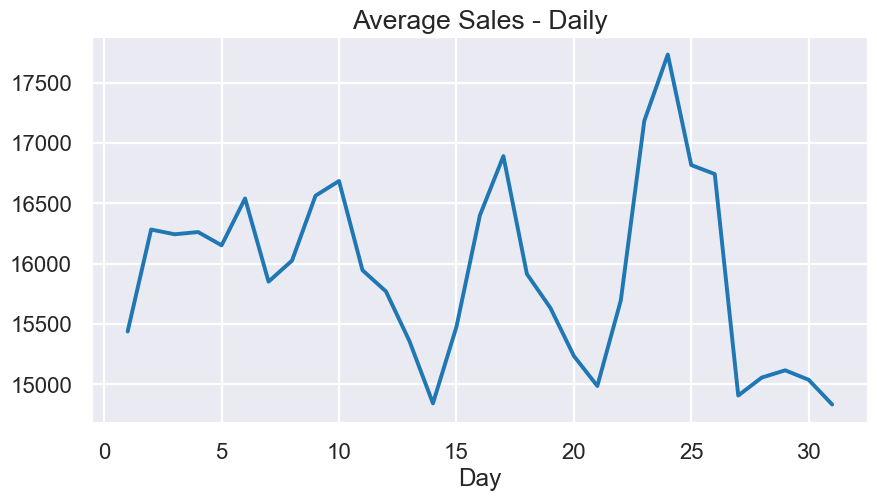

In [95]:
plt.figure(figsize=(10,5))
df.groupby('Day').mean()['Weekly_Sales'].plot()
plt.title('Average Sales - Daily')
plt.show()


Sales are high around the 25th of the month.

C:\Users\jeroc\AppData\Local\Temp\ipykernel_17572\2130404558.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Month').mean()['Weekly_Sales'].plot()


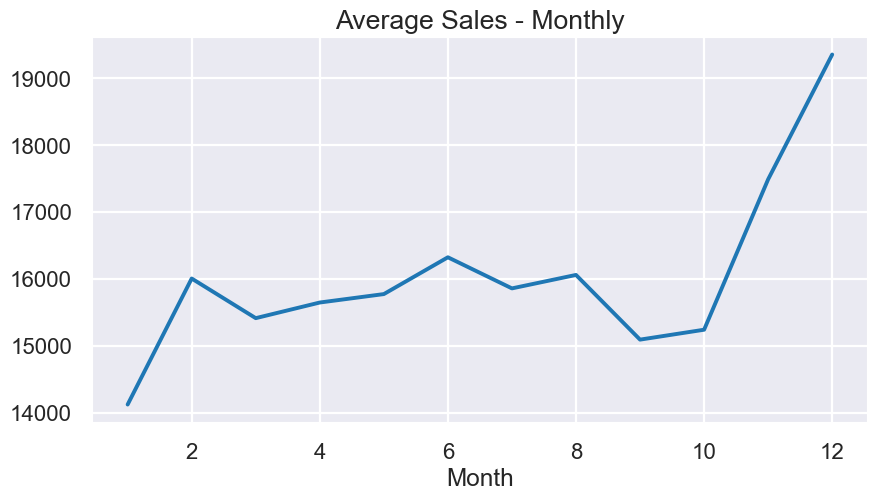

In [96]:
plt.figure(figsize=(10,5))
df.groupby('Month').mean()['Weekly_Sales'].plot()
plt.title('Average Sales - Monthly')
plt.show()


We see how the sales is high in november and december

Let’s draw the simple moving average for 30 days period.

C:\Users\jeroc\AppData\Local\Temp\ipykernel_17572\1652135494.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sma = sma[window_size - 1:]


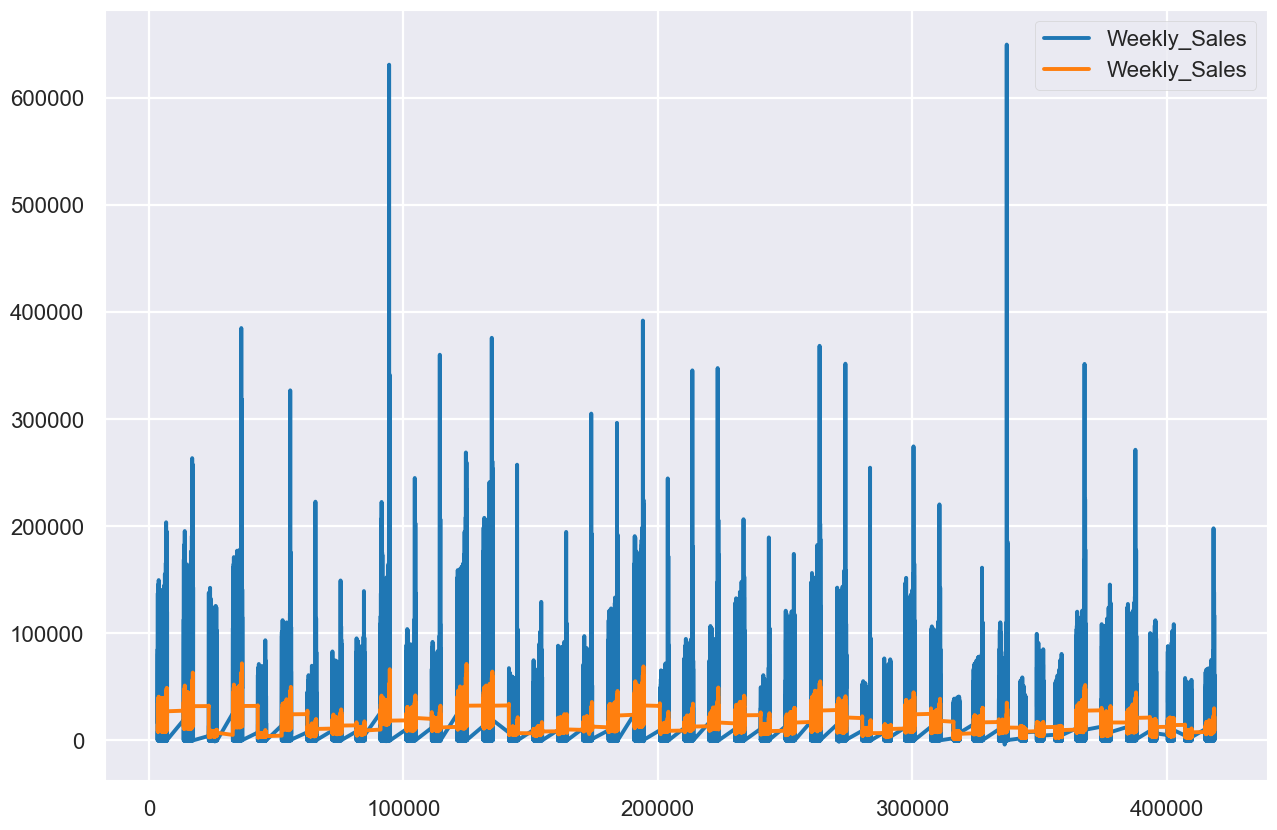

In [97]:
plt.figure(figsize=(15, 10))

# Calculating Simple Moving Average
# for a window period of 30 days
window_size = 30
data = df[df['Year']==2011]
windows = data['Weekly_Sales'].rolling(window_size)
sma = windows.mean()
sma = sma[window_size - 1:]

data['Weekly_Sales'].plot()
sma.plot()
plt.legend()
plt.show()


As the data in the Weekly sales column is continuous let’s check the distribution of it and check whether there are some outliers in this column or not.

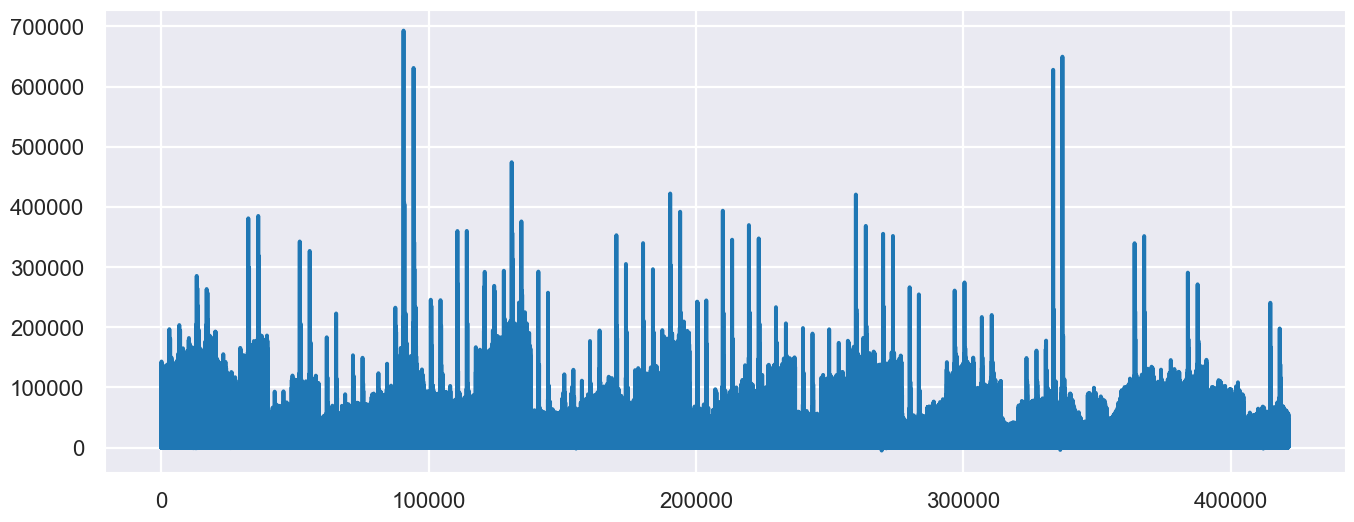

In [98]:
plt.figure(figsize=(16,6))
df['Weekly_Sales'].plot()
plt.show()

No way to clearly se the trend of sales. Let's visualize them weekly, monthly and yearly

In [99]:
df.groupby('Month')['Weekly_Sales'].mean() # to see the best months for sale

Month
1     14126.075111
2     16008.779217
3     15416.657597
4     15650.338357
5     15776.337202
6     16326.137002
7     15861.419650
8     16062.516933
9     15095.886154
10    15243.855576
11    17491.031424
12    19355.702141
Name: Weekly_Sales, dtype: float64

In [100]:
#Weekly
df_week = df.resample('W').mean() #resample data as weekly

plt.figure(figsize=(16,6))
df_week['Weekly_Sales'].plot()
plt.title('Average Sales - Weekly')
plt.show()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Int64Index'

Let's see yearly sales

In [101]:
df.groupby('Year')['Weekly_Sales'].mean() # to see the best months for sale

Year
2010    16270.275737
2011    15954.070675
2012    15694.948597
Name: Weekly_Sales, dtype: float64

<AxesSubplot: xlabel='Month'>

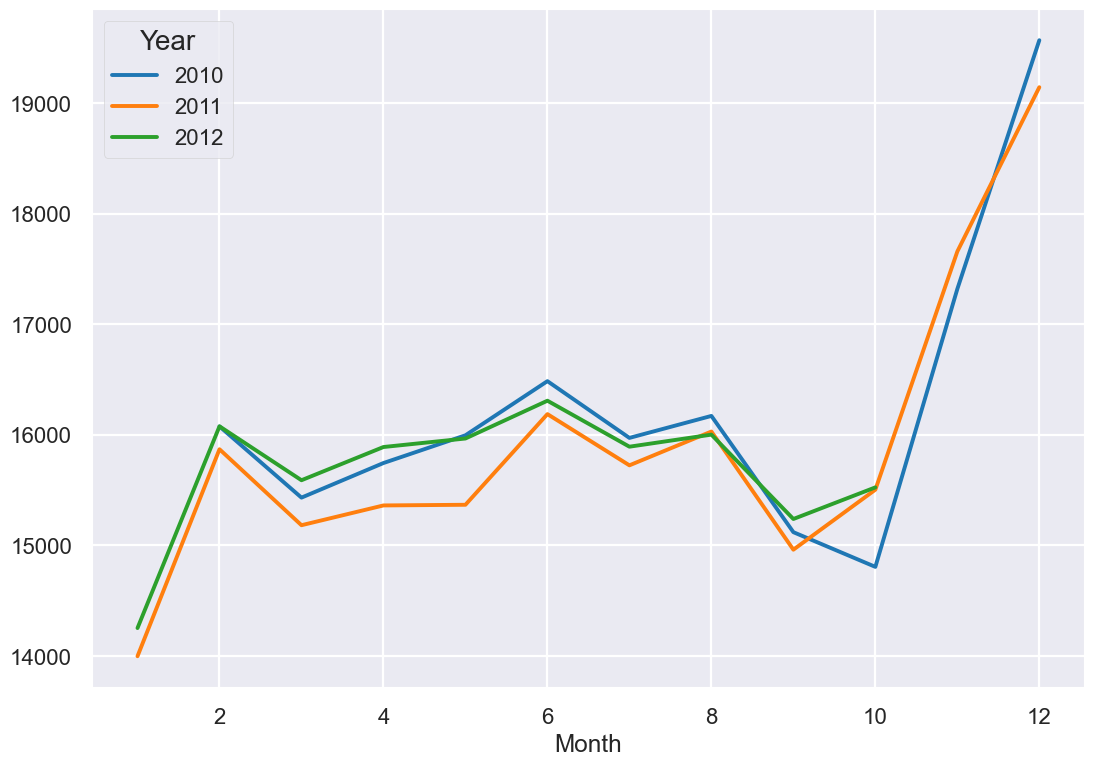

In [102]:
monthly_sales = pd.pivot_table(df, values = "Weekly_Sales", columns = "Year", index = "Month")
monthly_sales.plot()

Note: clearly we can see that 2010 had high sales

Let's check the correlation between the variables.

C:\Users\jeroc\AppData\Local\Temp\ipykernel_17572\2959262968.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr() > 0.8,


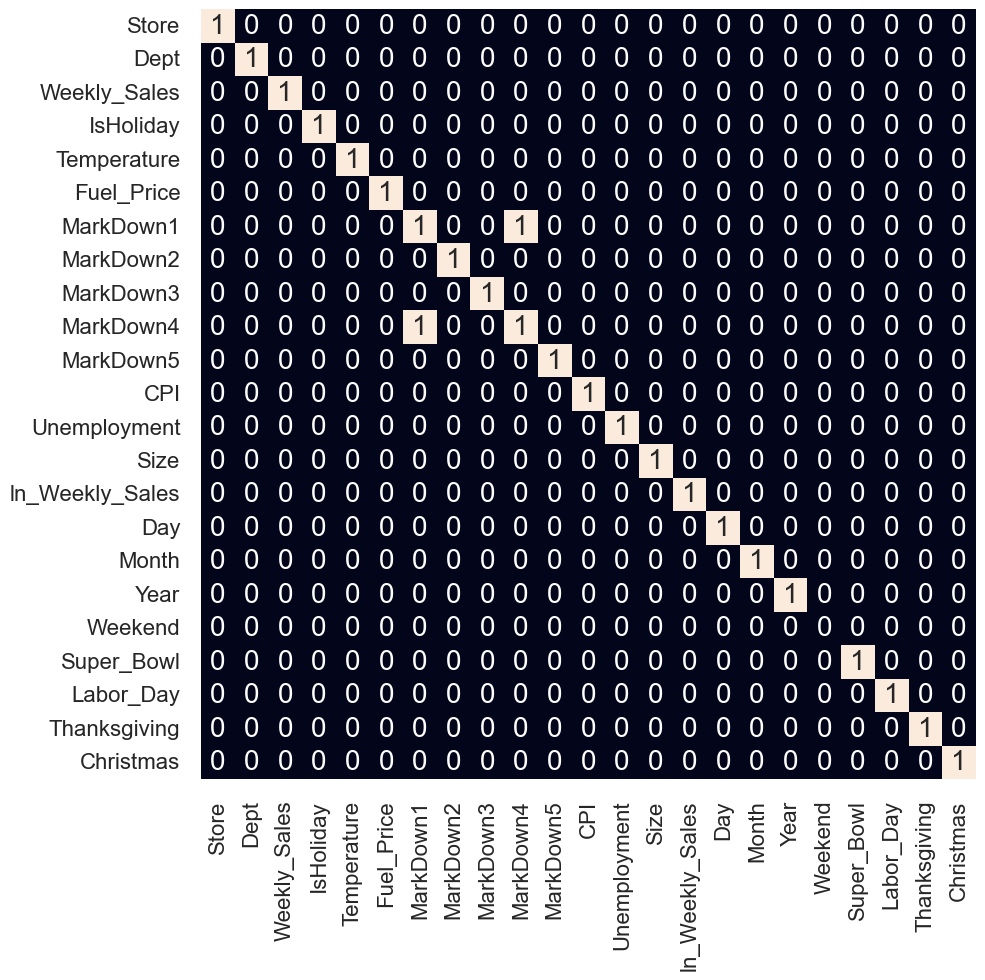

In [103]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr() > 0.8,
		annot=True,
		cbar=False)
plt.show()


Temperature, unemployment, CPI, Fuel_Price and markdown4 and 5 have no significant effect on weekly sales, We drop them.  It can create multicollinearity problem, maybe. So, first I will try without them.

In [137]:
#Change encoding
df2 = df.copy() # to keep original dataframe taking copy of it
df2['Super_Bowl'] = df2['Super_Bowl'].astype(bool).astype(int) # changing T,F to 0-1
df2['Thanksgiving'] = df2['Thanksgiving'].astype(bool).astype(int) # changing T,F to 0-1
df2['Labor_Day'] = df2['Labor_Day'].astype(bool).astype(int) # changing T,F to 0-1
df2['Christmas'] = df2['Christmas'].astype(bool).astype(int) # changing T,F to 0-1
df2['IsHoliday'] = df2['IsHoliday'].astype(bool).astype(int) # changing T,F to 0-1
df_new = df2.copy() # taking the copy of encoded df to keep it original

In [138]:
#Dropping columns with negative correction with the target
drop_col = ['Temperature','MarkDown4','MarkDown5','CPI','Unemployment', 'Weekend', 'Fuel_Price', 'Labor_Day']
df_new.drop(drop_col, axis=1, inplace=True) # dropping columns

 Multivariate Analysis
 - heat map shows the correlation between the variables.

C:\Users\jeroc\AppData\Local\Temp\ipykernel_17572\1441166953.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_new.corr(), annot = True, vmin = -1, vmax = 1)


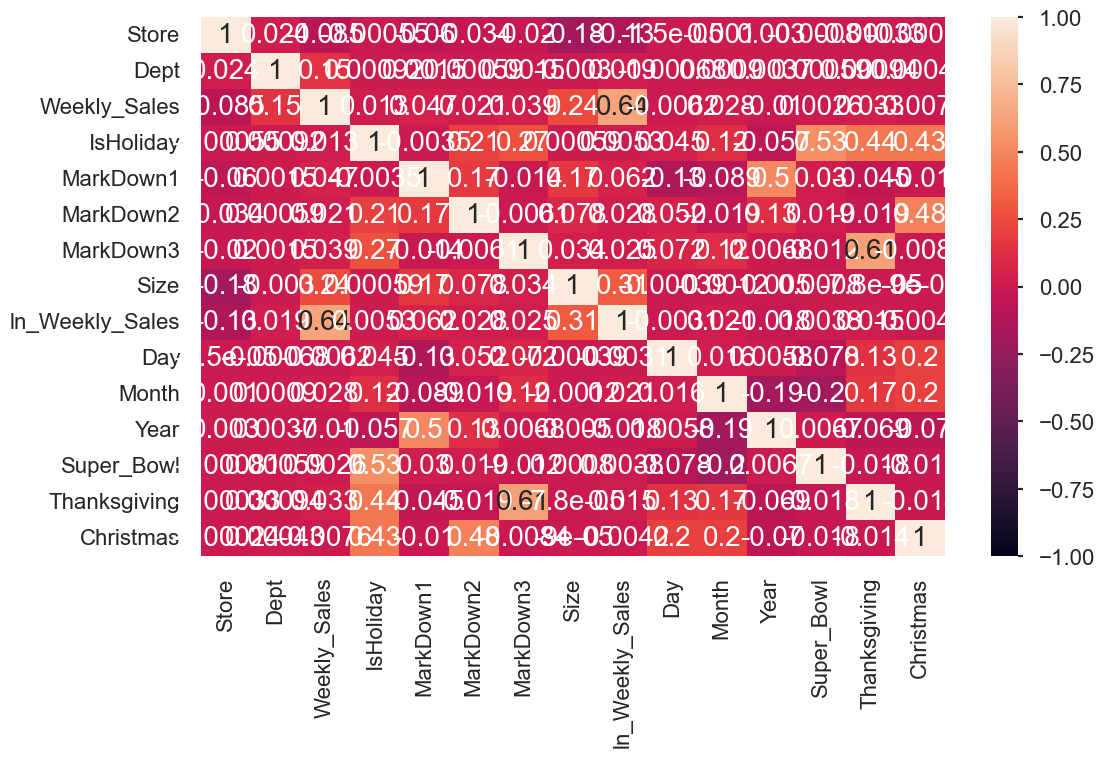

In [139]:
plt.figure(figsize=(12, 7))
sns.heatmap(df_new.corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

Now Let's represent subgroups from our dataset for the regression analysis (dummy variable)
#### Dummy Variables

In [140]:
aset=df[['Store','Dept']]
bset=df[['Day','Month','Year']]

def create_dummies(df,colname):
    col_dummies=pd.get_dummies(df[colname],prefix=colname,drop_first=True)
    df=pd.concat([df,col_dummies],axis=1)
    df.drop(colname,axis=1,inplace=True)
    return df

In [177]:
for c_feature in aset:
    aset[c_feature]=aset[c_feature].astype('category')
    aset=create_dummies(aset, c_feature)
for c_feature in bset:
    bset[c_feature]=bset[c_feature].astype('category')
    bset=create_dummies(bset,c_feature)

In [178]:
print(aset.shape)
print(bset.shape)

(421570, 124)
(421570, 43)


In [180]:
cat_var['Type']=cat_var['Type'].astype('category')
cat_var = create_dummies(cat_var,'Type')


KeyError: 'Type'

In [144]:
cat_var.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   Type_B  421570 non-null  uint8
 1   Type_C  421570 non-null  uint8
dtypes: uint8(2)
memory usage: 20.1 MB


In [179]:
#Changing the data type
df['Type']=df['Type'].astype('category')
df = create_dummies(df,'Type')


KeyError: 'Type'

In [175]:
dff=df.copy()
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 26 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Store            421570 non-null  int64         
 1   Dept             421570 non-null  int64         
 2   Date             421570 non-null  datetime64[ns]
 3   Weekly_Sales     421570 non-null  float64       
 4   IsHoliday        421570 non-null  bool          
 5   Temperature      421570 non-null  float64       
 6   Fuel_Price       421570 non-null  float64       
 7   MarkDown1        421570 non-null  float64       
 8   MarkDown2        421570 non-null  float64       
 9   MarkDown3        421570 non-null  float64       
 10  MarkDown4        421570 non-null  float64       
 11  MarkDown5        421570 non-null  float64       
 12  CPI              421570 non-null  float64       
 13  Unemployment     421570 non-null  float64       
 14  Size             421

In [176]:
#Let's drop some variables
dff.drop(columns=['Store','Dept', 'Date'], inplace=True)
dff.drop(columns=['Day','Month','Year'], inplace=True)

In [158]:
#Let's merge all the data sets
dff = pd.concat([dff, aset, bset], axis=1)
dff.shape

(421570, 188)

In [159]:
dff.describe().T

,count,mean,std,min,25%,50%,75%,max
Weekly_Sales,421570.0,15981.258123,22711.183519,-4988.940,2079.650,7612.030,20205.8525,693099.360
Temperature,421570.0,60.090059,18.447931,-2.060,46.680,62.090,74.2800,100.140
Fuel_Price,421570.0,3.361027,0.458515,2.472,2.933,3.452,3.7380,4.468
MarkDown1,421570.0,2590.074819,6052.385934,0.000,0.000,0.000,2809.0500,88646.760
MarkDown2,421570.0,879.974298,5084.538801,-265.760,0.000,0.000,2.2000,104519.540
...,...,...,...,...,...,...,...,...
Month_10,421570.0,0.090998,0.287607,0.000,0.000,0.000,0.0000,1.000
Month_11,421570.0,0.056012,0.229945,0.000,0.000,0.000,0.0000,1.000
Month_12,421570.0,0.070693,0.256311,0.000,0.000,0.000,0.0000,1.000
Year_2011,421570.0,0.364004,0.481150,0.000,0.000,0.000,1.0000,1.000


ASSUMPTION

In [160]:
## We will take the log transformation to make Y normal

dff['ln_Weekly_Sales'] = np.log(df.Weekly_Sales)
#sns.distplot(dff['ln_Weekly_Sales'])

C:\Users\jeroc\Python\Python310\lib\site-packages\pandas\core\arraylike.py:405: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\jeroc\Python\Python310\lib\site-packages\pandas\core\arraylike.py:405: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


There must be a relation between X and Y

In [161]:
corr_dummy=dff.corr()
corr_dummy

C:\Users\jeroc\AppData\Local\Temp\ipykernel_17572\3370481734.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_dummy=dff.corr()


,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,...,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Year_2011,Year_2012
Weekly_Sales,1.000000,0.012774,-0.002312,-0.000120,0.047172,0.020716,0.038562,0.037467,0.050465,-0.020921,...,-0.002728,0.004789,-0.001731,0.001129,-0.012330,-0.010273,0.016193,0.040980,-0.000906,-0.008298
IsHoliday,0.012774,1.000000,-0.155949,-0.078281,-0.003521,0.207604,0.266471,0.011565,-0.015235,-0.001944,...,-0.083183,-0.086762,-0.090273,-0.086802,0.198821,-0.087043,0.173348,0.139288,0.021653,-0.060574
Temperature,-0.002312,-0.155949,1.000000,0.143859,-0.026415,-0.179672,-0.056026,-0.050281,-0.014752,0.182112,...,0.079844,0.250365,0.342717,0.320307,0.202357,0.015809,-0.141249,-0.305629,-0.076659,0.097256
Fuel_Price,-0.000120,-0.078281,0.143859,1.000000,0.297056,0.029153,0.018615,0.166622,0.215420,-0.164210,...,0.144741,0.043538,-0.034652,0.038679,0.051707,-0.006028,-0.091890,-0.118912,0.333831,0.501519
MarkDown1,0.047172,-0.003521,-0.026415,0.297056,1.000000,0.174868,-0.014411,0.838904,0.415050,0.010915,...,0.015757,-0.007000,-0.061961,0.088204,-0.020276,-0.079371,-0.011545,-0.036881,-0.236222,0.558438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Month_10,-0.010273,-0.087043,0.015809,-0.006028,-0.079371,-0.054428,-0.026275,-0.060122,-0.040956,0.006401,...,-0.095669,-0.099784,-0.103822,-0.099830,-0.100074,1.000000,-0.077071,-0.087265,-0.036750,0.005000
Month_11,0.016193,0.173348,-0.141249,-0.091890,-0.011545,0.021055,0.302236,-0.033091,-0.003294,-0.003482,...,-0.073653,-0.076822,-0.079931,-0.076858,-0.077046,-0.077071,1.000000,-0.067184,0.070876,-0.160338
Month_12,0.040980,0.139288,-0.305629,-0.118912,-0.036881,0.182016,0.006582,-0.031218,0.145007,-0.002939,...,-0.083396,-0.086983,-0.090504,-0.087024,-0.087237,-0.087265,-0.067184,1.000000,0.080765,-0.181546
Year_2011,-0.000906,0.021653,-0.076659,0.333831,-0.236222,0.021667,0.106192,-0.169609,-0.119228,-0.000401,...,-0.018408,-0.037107,-0.004924,-0.036572,0.013811,-0.036750,0.070876,0.080765,1.000000,-0.497971


Note: Correlation is expressed on a range from +1 to -1, known as the correlation coefficent. Values below zero express negative correlation.
A negative correlation is a relationship between two variables such that as the value of one variable increases, the other decreases.


In [203]:
corrm_new = corr_dummy[(corr_dummy.ln_Weekly_Sales < 0.01) & (corr_dummy.ln_Weekly_Sales > -0.01)].T.columns
corrm_new

Index(['IsHoliday', 'Fuel_Price', 'Super_Bowl', 'Labor_Day', 'Christmas',
       'Store_12', 'Store_17', 'Store_21', 'Store_26', 'Store_34', 'Store_35',
       'Store_40', 'Store_45', 'Dept_17', 'Dept_24', 'Dept_26', 'Dept_29',
       'Dept_33', 'Dept_67', 'Dept_71', 'Day_2', 'Day_3', 'Day_4', 'Day_5',
       'Day_6', 'Day_7', 'Day_8', 'Day_9', 'Day_10', 'Day_11', 'Day_12',
       'Day_13', 'Day_14', 'Day_15', 'Day_16', 'Day_17', 'Day_18', 'Day_19',
       'Day_20', 'Day_21', 'Day_22', 'Day_23', 'Day_24', 'Day_25', 'Day_26',
       'Day_27', 'Day_28', 'Day_29', 'Day_30', 'Day_31', 'Month_2', 'Month_3',
       'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9',
       'Month_10', 'Year_2011'],
      dtype='object')

In [163]:
dff.shape

(421570, 188)

In [164]:
dff2=dff.drop(columns=corrm_new)

In [208]:
dff2 = dff2.drop(['Date'], axis=1)
dff2.shape


(421570, 71)

<AxesSubplot: >

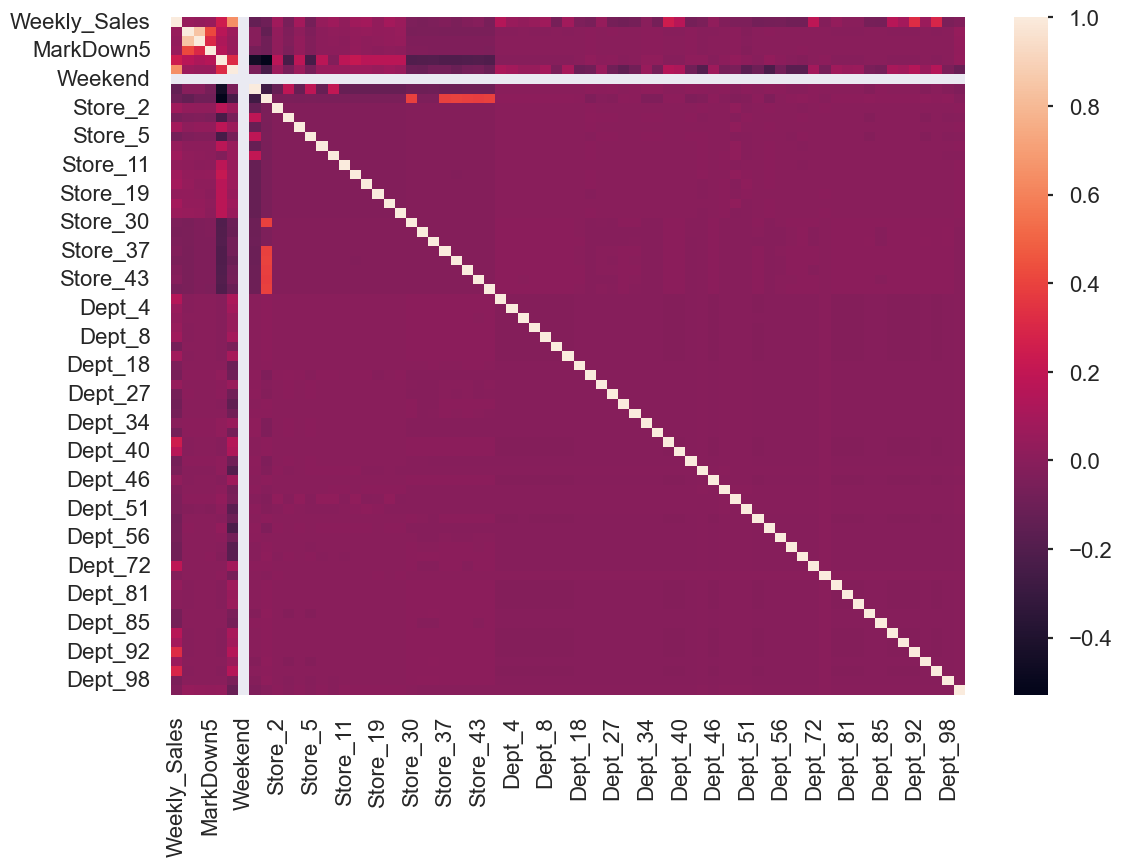

In [209]:
sns.heatmap(dff2.corr())

- dff2 is the final Dataframe for modeling

In [210]:
#Let's look at the columns
dff2.columns

Index(['Weekly_Sales', 'MarkDown1', 'MarkDown4', 'MarkDown5', 'Size',
       'ln_Weekly_Sales', 'Weekend', 'Type_B', 'Type_C', 'Store_2', 'Store_3',
       'Store_4', 'Store_5', 'Store_6', 'Store_10', 'Store_11', 'Store_13',
       'Store_14', 'Store_19', 'Store_20', 'Store_27', 'Store_30', 'Store_33',
       'Store_36', 'Store_37', 'Store_38', 'Store_42', 'Store_43', 'Store_44',
       'Dept_2', 'Dept_4', 'Dept_5', 'Dept_7', 'Dept_8', 'Dept_12', 'Dept_13',
       'Dept_18', 'Dept_19', 'Dept_23', 'Dept_27', 'Dept_28', 'Dept_31',
       'Dept_34', 'Dept_36', 'Dept_38', 'Dept_40', 'Dept_41', 'Dept_45',
       'Dept_46', 'Dept_47', 'Dept_48', 'Dept_51', 'Dept_52', 'Dept_54',
       'Dept_56', 'Dept_59', 'Dept_60', 'Dept_72', 'Dept_78', 'Dept_79',
       'Dept_81', 'Dept_82', 'Dept_83', 'Dept_85', 'Dept_90', 'Dept_91',
       'Dept_92', 'Dept_93', 'Dept_95', 'Dept_98', 'Dept_99'],
      dtype='object')

### Building prediction model

Temperature, unemployment, CPI have no significant effect on weekly sales, so I will drop them. Also, Markdown 4 and 5 highly correlated with Markdown 1. So, I will drop them also. It can create multicollinearity problem, maybe. So, first I will try without them.

Now we will separate the features and target variables and split them into training and the testing data by using which we will select the model which is performing best on the validation data.

In [215]:
#As we observed earlier let’s remove the outliers which are present in the data.

dff3 = dff2[dff2['Weekly_Sales']<140]
print(dff3.shape)

(31111, 71)

In [218]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27999 entries, 114857 to 343365
Data columns (total 69 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MarkDown1  27999 non-null  float64
 1   MarkDown4  27999 non-null  float64
 2   MarkDown5  27999 non-null  float64
 3   Size       27999 non-null  int64  
 4   Weekend    27999 non-null  bool   
 5   Type_B     27999 non-null  uint8  
 6   Type_C     27999 non-null  uint8  
 7   Store_2    27999 non-null  uint8  
 8   Store_3    27999 non-null  uint8  
 9   Store_4    27999 non-null  uint8  
 10  Store_5    27999 non-null  uint8  
 11  Store_6    27999 non-null  uint8  
 12  Store_10   27999 non-null  uint8  
 13  Store_11   27999 non-null  uint8  
 14  Store_13   27999 non-null  uint8  
 15  Store_14   27999 non-null  uint8  
 16  Store_19   27999 non-null  uint8  
 17  Store_20   27999 non-null  uint8  
 18  Store_27   27999 non-null  uint8  
 19  Store_30   27999 non-null  uint8  
 20  

We have split our data into training and validation data also the normalization of the data has been done. Now let’s train some state-of-the-art machine learning models and select the best out of them using the validation dataset.

1. Multiple Linear Regression

## For Week 5
Feature Engineering

Dealing with missing values

In [514]:
#We going to replace missing value with 0
df1 = data.copy()
df1 = data.fillna(0)
print(df1.shape)
df1.isnull().sum() #check for missing value

(420212, 25)


Store              0
Dept               0
Date               0
Weekly_Sales       0
IsHoliday          0
Temperature        0
Fuel_Price         0
MarkDown1          0
MarkDown2          0
MarkDown3          0
MarkDown4          0
MarkDown5          0
CPI                0
Unemployment       0
Type               0
Size               0
ln_Weekly_Sales    0
Day                0
Month              0
Year               0
Weekend            0
Super_Bowl         0
Labor_Day          0
Thanksgiving       0
Christmas          0
dtype: int64

In [515]:
#Dropping less importance columns, and column with negative correction with the target
df1 = df1.drop(['Store', 'Temperature','MarkDown4','MarkDown5','CPI','Unemployment', 'Weekend', 'Christmas', 'Year',
                'Fuel_Price', 'Day', 'Labor_Day', 'Size', 'IsHoliday', 'Super_Bowl'], axis=1) # dropping columns
print(df1.info())
df1.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420212 entries, 0 to 421569
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Dept             420212 non-null  int64         
 1   Date             420212 non-null  datetime64[ns]
 2   Weekly_Sales     420212 non-null  float64       
 3   MarkDown1        420212 non-null  float64       
 4   MarkDown2        420212 non-null  float64       
 5   MarkDown3        420212 non-null  float64       
 6   Type             420212 non-null  object        
 7   ln_Weekly_Sales  420212 non-null  float64       
 8   Month            420212 non-null  int64         
 9   Thanksgiving     420212 non-null  int32         
dtypes: datetime64[ns](1), float64(5), int32(1), int64(2), object(1)
memory usage: 49.8+ MB
None


(420212, 10)

Converting date to a Month period, and then sum the number of items in each month

In [516]:
df1['Date'] = df1['Date'].dt.to_period("M")
month_sales = df1.groupby('Date').sum().reset_index()

C:\Users\jeroc\AppData\Local\Temp\ipykernel_17572\3994060057.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  month_sales = df1.groupby('Date').sum().reset_index()


Let's covert the resulting date column to timestamp datatype

In [517]:
month_sales['Date'] = month_sales['Date'].dt.to_timestamp()

In [518]:
#Renaming colunms
month_sales.rename(columns = {'Weekly_Sales':'Sales'}, inplace = True)
month_sales.rename(columns = {'ln_Weekly_Sales':'ln_Sales'}, inplace = True)
month_sales.head(10)

,Date,Dept,Sales,MarkDown1,MarkDown2,MarkDown3,ln_Sales,Month,Thanksgiving
0,2010-02-01,521900,1.903360e+08,0.0,0.0,0.0,100719.685666,23610,0
1,2010-03-01,517894,1.819236e+08,0.0,0.0,0.0,100054.224244,35256,0
2,2010-04-01,647186,2.314140e+08,0.0,0.0,0.0,124907.092198,58636,0
3,2010-05-01,514877,1.867116e+08,0.0,0.0,0.0,99496.250124,58115,0
4,2010-06-01,513703,1.922469e+08,0.0,0.0,0.0,99652.749456,69690,0
5,2010-07-01,644225,2.325827e+08,0.0,0.0,0.0,124004.214804,101696,0
6,2010-08-01,511781,1.876416e+08,0.0,0.0,0.0,99185.618823,92632,0
7,2010-09-01,513545,1.772717e+08,0.0,0.0,0.0,99212.323071,105156,0
8,2010-10-01,643771,2.171696e+08,0.0,0.0,0.0,124659.799570,146350,0
9,2010-11-01,513463,2.028552e+08,0.0,0.0,0.0,100942.916038,128513,2930


Visualizaion

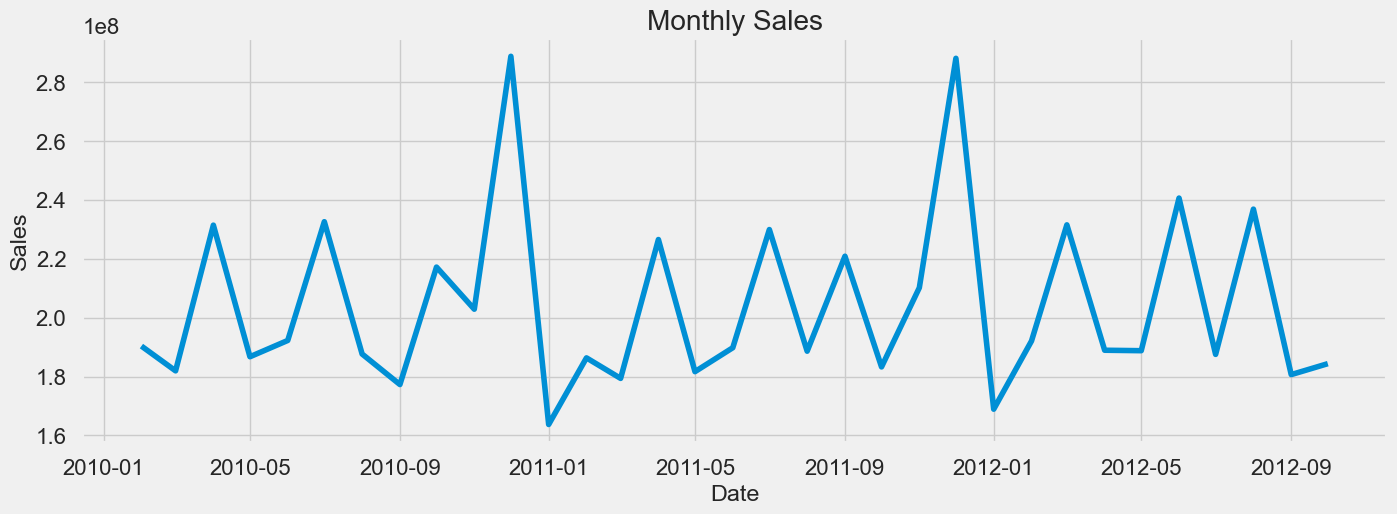

In [497]:
plt.figure(figsize=(15,5))
plt.plot(month_sales['Date'], month_sales['Sales'])
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Monthly Sales")
plt.show()

Let us find the monthly sales difference to make sales stationary

In [519]:
month_sales['Sales_diff'] = month_sales['Sales'].diff()
month_sales = month_sales.dropna()
month_sales.head(10)

,Date,Dept,Sales,MarkDown1,MarkDown2,MarkDown3,ln_Sales,Month,Thanksgiving,Sales_diff
1,2010-03-01,517894,1.819236e+08,0.0,0.0,0.0,100054.224244,35256,0,-8412447.66
2,2010-04-01,647186,2.314140e+08,0.0,0.0,0.0,124907.092198,58636,0,49490426.03
3,2010-05-01,514877,1.867116e+08,0.0,0.0,0.0,99496.250124,58115,0,-44702402.36
4,2010-06-01,513703,1.922469e+08,0.0,0.0,0.0,99652.749456,69690,0,5535317.37
5,2010-07-01,644225,2.325827e+08,0.0,0.0,0.0,124004.214804,101696,0,40335743.89
6,2010-08-01,511781,1.876416e+08,0.0,0.0,0.0,99185.618823,92632,0,-44941098.36
7,2010-09-01,513545,1.772717e+08,0.0,0.0,0.0,99212.323071,105156,0,-10369861.97
8,2010-10-01,643771,2.171696e+08,0.0,0.0,0.0,124659.799570,146350,0,39897882.16
9,2010-11-01,513463,2.028552e+08,0.0,0.0,0.0,100942.916038,128513,2930,-14314403.20
10,2010-12-01,647514,2.887661e+08,0.0,0.0,0.0,128766.772732,176412,0,85910949.24


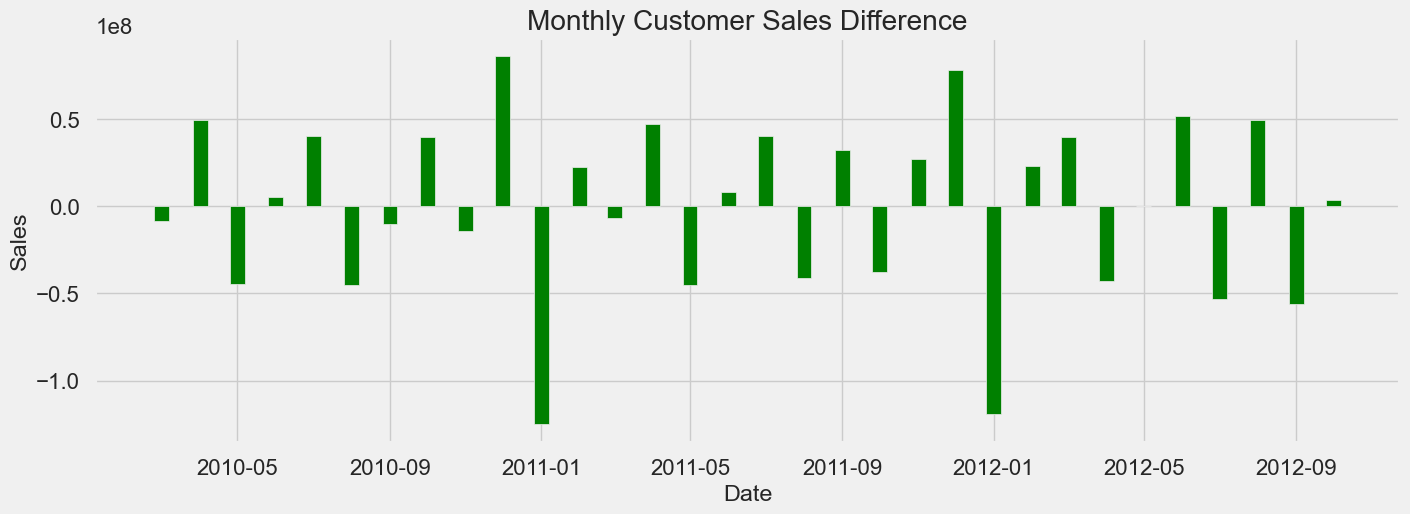

In [499]:
# Visualisation
plt.figure(figsize=(15,5))
plt.bar(month_sales['Date'], month_sales['Sales_diff'], width=12, color="green")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Monthly Customer Sales Difference")
plt.show()

Dropping off sales and date

In [520]:
data_model = month_sales.drop(['Date', 'Sales', 'MarkDown1', 'MarkDown2', 'MarkDown3'], axis=1)
data_model.info()
print(data_model.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 1 to 32
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Dept          32 non-null     int64  
 1   ln_Sales      32 non-null     float64
 2   Month         32 non-null     int64  
 3   Thanksgiving  32 non-null     int32  
 4   Sales_diff    32 non-null     float64
dtypes: float64(2), int32(1), int64(2)
memory usage: 1.4 KB
(32, 5)


Preparing data for the model

In [502]:
#let's prepare data for 12 months
for i in range(1, 13):
    col_name = 'month_' + str(i)
    data_model[col_name] = data_model['Sales_diff'].shift(i)
data_model= data_model.dropna().reset_index(drop=True)
print(data_model.info())
data_model.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Dept          8 non-null      int64  
 1   ln_Sales      8 non-null      float64
 2   Month         8 non-null      int64  
 3   Thanksgiving  8 non-null      int32  
 4   Sales_diff    8 non-null      float64
 5   month_1       8 non-null      float64
 6   month_2       8 non-null      float64
 7   month_3       8 non-null      float64
 8   month_4       8 non-null      float64
 9   month_5       8 non-null      float64
 10  month_6       8 non-null      float64
 11  month_7       8 non-null      float64
 12  month_8       8 non-null      float64
 13  month_9       8 non-null      float64
 14  month_10      8 non-null      float64
 15  month_11      8 non-null      float64
 16  month_12      8 non-null      float64
dtypes: float64(14), int32(1), int64(2)
memory usage: 1.2 KB
None


,Dept,ln_Sales,Month,Thanksgiving,Sales_diff,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,655281,126027.386133,44445,0,39448600.85,23168744.24,-1.191865e+08,7.791959e+07,2.690032e+07,-3.759238e+07,3.225382e+07,-4.131339e+07,4.014003e+07,8.125896e+06,-44880033.40,47169093.47,-6972634.01
1,524671,100838.535070,47384,0,-42591120.75,39448600.85,2.316874e+07,-1.191865e+08,7.791959e+07,2.690032e+07,-3.759238e+07,3.225382e+07,-4.131339e+07,4.014003e+07,8125896.34,-44880033.40,47169093.47
2,523267,100079.004865,58805,0,-153599.01,-42591120.75,3.944860e+07,2.316874e+07,-1.191865e+08,7.791959e+07,2.690032e+07,-3.759238e+07,3.225382e+07,-4.131339e+07,40140034.53,8125896.34,-44880033.40
3,654717,125148.927854,88140,0,51842507.91,-153599.01,-4.259112e+07,3.944860e+07,2.316874e+07,-1.191865e+08,7.791959e+07,2.690032e+07,-3.759238e+07,3.225382e+07,-41313386.62,40140034.53,8125896.34
4,525835,99204.124715,82348,0,-53100314.43,51842507.91,-1.535990e+05,-4.259112e+07,3.944860e+07,2.316874e+07,-1.191865e+08,7.791959e+07,2.690032e+07,-3.759238e+07,32253819.70,-41313386.62,40140034.53
5,656460,124608.641226,117968,0,49343408.41,-53100314.43,5.184251e+07,-1.535990e+05,-4.259112e+07,3.944860e+07,2.316874e+07,-1.191865e+08,7.791959e+07,2.690032e+07,-37592380.84,32253819.70,-41313386.62
6,523534,99777.672449,106380,0,-56206697.00,49343408.41,-5.310031e+07,5.184251e+07,-1.535990e+05,-4.259112e+07,3.944860e+07,2.316874e+07,-1.191865e+08,7.791959e+07,26900322.31,-37592380.84,32253819.70
7,525116,100887.219103,118430,0,3714789.37,-56206697.00,4.934341e+07,-5.310031e+07,5.184251e+07,-1.535990e+05,-4.259112e+07,3.944860e+07,2.316874e+07,-1.191865e+08,77919591.68,26900322.31,-37592380.84


Outlier treatment

In [530]:
dff = df1[df1['Weekly_Sales'] < 140]
dff = df1.drop(['Type', 'Date'], axis=1) # dropping columns
print("Dff shape", dff.shape)
dff.info()

Dff shape (420212, 8)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 420212 entries, 0 to 421569
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Dept             420212 non-null  int64  
 1   Weekly_Sales     420212 non-null  float64
 2   MarkDown1        420212 non-null  float64
 3   MarkDown2        420212 non-null  float64
 4   MarkDown3        420212 non-null  float64
 5   ln_Weekly_Sales  420212 non-null  float64
 6   Month            420212 non-null  int64  
 7   Thanksgiving     420212 non-null  int32  
dtypes: float64(5), int32(1), int64(2)
memory usage: 43.4 MB


In [531]:
#Dealing with outliers, i have decided to set them aside first.
data_whole= df1[df1['Weekly_Sales'] < 140]
print("data_whole shape", dff.shape)
data_whole.info()

data_whole shape (420212, 8)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 29753 entries, 34 to 421550
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype    
---  ------           --------------  -----    
 0   Dept             29753 non-null  int64    
 1   Date             29753 non-null  period[M]
 2   Weekly_Sales     29753 non-null  float64  
 3   MarkDown1        29753 non-null  float64  
 4   MarkDown2        29753 non-null  float64  
 5   MarkDown3        29753 non-null  float64  
 6   Type             29753 non-null  object   
 7   ln_Weekly_Sales  29753 non-null  float64  
 8   Month            29753 non-null  int64    
 9   Thanksgiving     29753 non-null  int32    
dtypes: float64(5), int32(1), int64(2), object(1), period[M](1)
memory usage: 2.4+ MB


- Let's categorize the sales

In [575]:
#defining function filter
def filter(x):
    if x <= 6000:
        return 'low'
    if (x > 6000 and x <= 12000):
        return 'medium'
    else:
        return 'high'
#applying the filter function to 'Salary' column
dff['category'] = df['Weekly_Sales'].apply(filter)

In [576]:
dff.head(10)

,Dept,Weekly_Sales,MarkDown1,MarkDown2,MarkDown3,ln_Weekly_Sales,Month,Thanksgiving,Date,category
0,1,24924.50,0.0,0.0,0.0,10.123607,2,0,NaT,high
1,2,50605.27,0.0,0.0,0.0,10.831811,2,0,NaT,high
2,3,13740.12,0.0,0.0,0.0,9.528075,2,0,NaT,high
3,4,39954.04,0.0,0.0,0.0,10.595485,2,0,NaT,high
4,5,32229.38,0.0,0.0,0.0,10.380634,2,0,NaT,high
5,6,5749.03,0.0,0.0,0.0,8.656786,2,0,NaT,low
6,7,21084.08,0.0,0.0,0.0,9.956274,2,0,NaT,high
7,8,40129.01,0.0,0.0,0.0,10.599855,2,0,NaT,high
8,9,16930.99,0.0,0.0,0.0,9.736901,2,0,NaT,high
9,10,30721.50,0.0,0.0,0.0,10.332718,2,0,NaT,high


#Let's plot it

In [577]:
#Categorical variables
print(dff.category.value_counts(), "\n")

#Let's express the data as a percentage by passing normalize = True
dff.category.value_counts(normalize=True)

low       186119
high      161780
medium     72313
Name: category, dtype: int64 



low       0.442917
high      0.384996
medium    0.172087
Name: category, dtype: float64

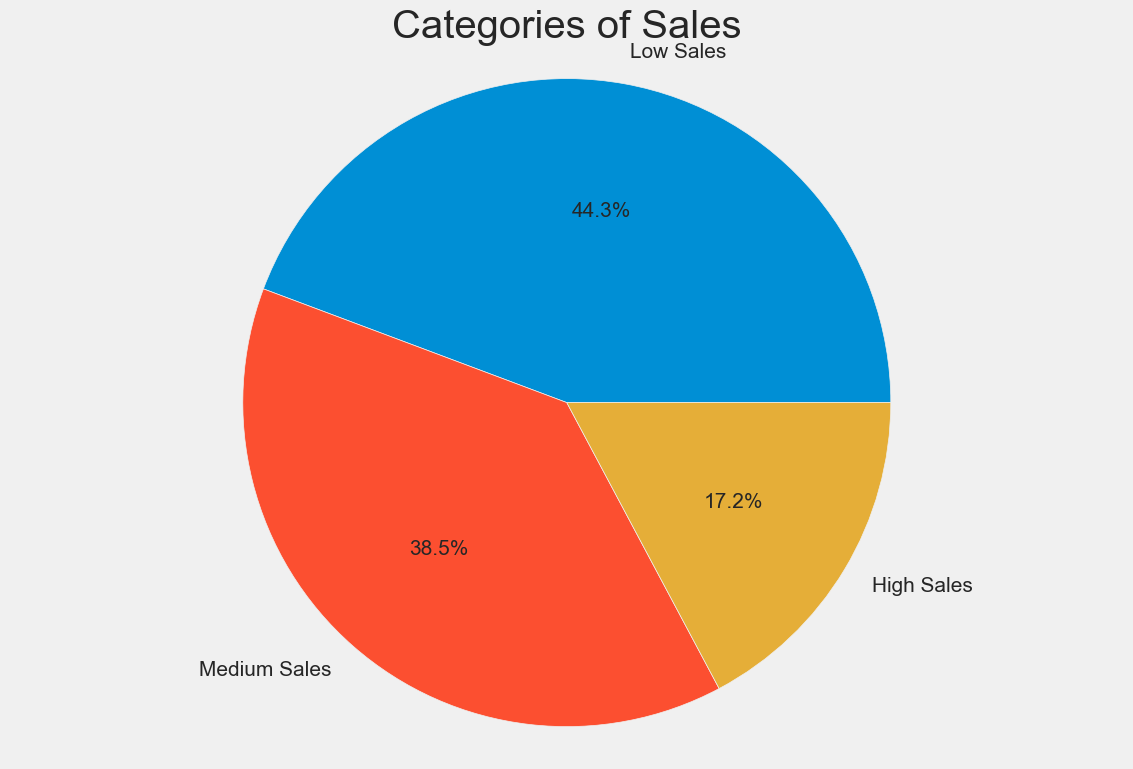

In [580]:
#Let's plot it
dff = [44.2917, 38.4996 , 17.2087 ]  #percentages
my_labels = 'Low Sales','Medium Sales', 'High Sales' # labels
plt.pie(dff,labels=my_labels,autopct='%1.1f%%', textprops={'fontsize': 15}) #plot pie type and bigger the labels
plt.axis('equal')
mpl.rcParams.update({'font.size': 20}) #bigger percentage labels
plt.title("Categories of Sales")
plt.show()

- Split the data into Train and Test data

In [539]:
#Dropping non numeric and target variable

XX = dff.drop(['Weekly_Sales'], axis=1) # dropping columns
yy = dff['Weekly_Sales']

#Let us split our data in training and test dataset
from sklearn.model_selection import train_test_split

XX_train, XX_test, yy_train, yy_test = train_test_split(XX, yy, test_size=0.1, random_state=123)

In [540]:
print("x_train shape: ", XX_train.shape)
print("Y_train shape: ", yy_train.shape)
print("x_test shape: ", XX_test.shape)
print("Y_test shape: ", yy_test.shape)

x_train shape:  (378190, 7)
Y_train shape:  (378190,)
x_test shape:  (42022, 7)
Y_test shape:  (42022,)


In [541]:
#Do it for the whole dataset

XXx = data_whole.drop(['Weekly_Sales'], axis=1) # dropping columns
yyy = data_whole['Weekly_Sales']

#Let us split our data in training and test dataset
from sklearn.model_selection import train_test_split

XXx_train, XXx_test, yyy_train, yyy_test = train_test_split(XXx, yyy, test_size=0.1, random_state=123)

In [542]:
print("x_train shape: ", XXx_train.shape)
print("Y_train shape: ", yyy_train.shape)
print("x_test shape: ", XXx_test.shape)
print("Y_test shape: ", yyy_test.shape)

x_train shape:  (26777, 9)
Y_train shape:  (26777,)
x_test shape:  (2976, 9)
Y_test shape:  (2976,)


Normalizing of features for stable and fast training

In [586]:
from sklearn.preprocessing import StandardScaler

# Normalizing the features for stable and fast training.
scaler = StandardScaler()
XX_train = scaler.fit_transform(XX_train)
XX_test = scaler.transform(XX_test)

<AxesSubplot: xlabel='Store', ylabel='Weekly_Sales'>

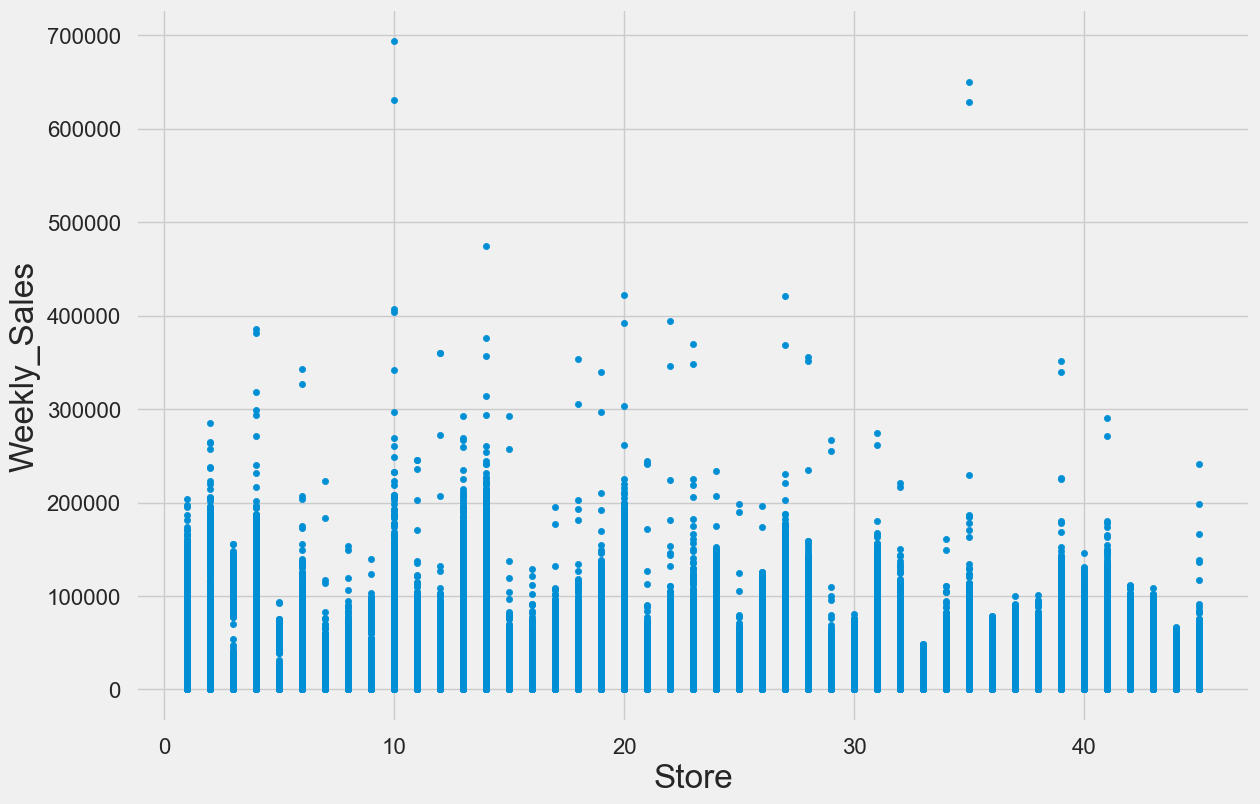

In [591]:
data.plot.scatter(x='Store', y='Weekly_Sales')

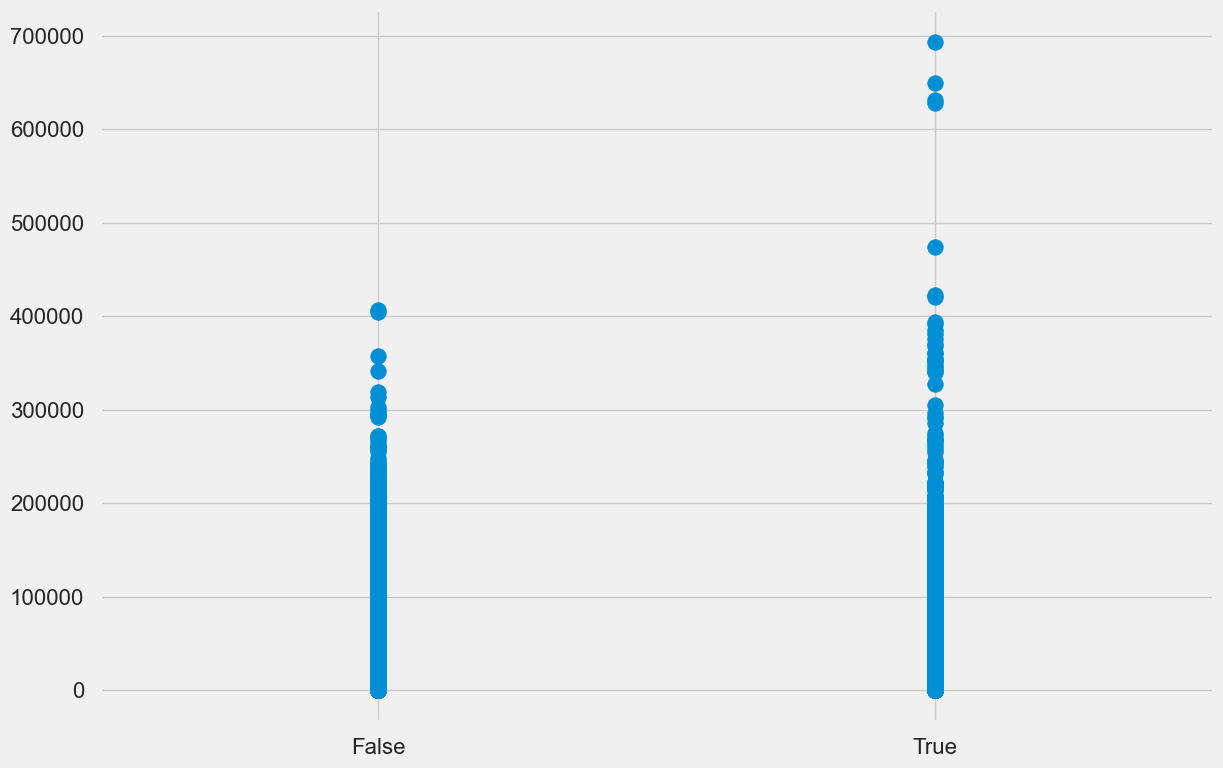

In [594]:
#data.plot.scatter(x='Type', y='Weekly_Sales') #work well
plt.scatter(df["IsHoliday"].astype(str), df["Weekly_Sales"])
plt.margins(x=0.5)
plt.show()

## Progress and comment on my results (Findings).

1. We started by importing necessary Libraries, then the 4 datasets converted to panda dataframes.
Python libraries make it easy for us to handle the data and perform typical and complex tasks with a single line of code.
After loading the dataframes, I merged them and get one main dataframe of size 421570 rows and 17 columns.

- Pandas – This library helps to load the data frame in a 2D array format and has multiple functions to perform analysis tasks in one go.
- Numpy – Numpy arrays are very fast and can perform large computations in a very short time.
- Matplotlib/Seaborn – This library is used to draw visualizations.
- Sklearn – This module contains multiple libraries are having pre-implemented functions to perform tasks from data preprocessing to model development and evaluation.
just to name a few.

2. We explored the dataframes to better understand them, and merged them.
3. task accomplished at step 2:
- Check for null values, duplicate value, size, shape, datatype, etc...

Walmart Inc. is an American multinational retail corporation that operates a chain of hypermarkets, discount department stores, and grocery stores in the United States. From what I found on Kaggle.com, the company has provided datasets  of 45 stores including sales. The data is provided on weekly basis. Walmart tries to find the impact of holidays on the sales of store. In the datasets are included four holidays’ weeks which are Christmas, Thanksgiving, Super bowl, Labor Day. Here we will Analyze the datasets wrangle it, split it into train and test data, train and them test the model to forecast the sales.

#### EDA

We have found that:
- Our merged dataframe has 45 Stores,  numbered from 1 to 45, and 81 department numbered from 1 to 99, but some numbers are missing such as there is no 88 or 89 etc. Total number of departments is 81.
- The dataframes have 3 type of store labeled A, B and C
- The dataframes have missing values essentially in the columns MarDowns1, MarDowns2, MarDowns3, MarDowns4,MarDowns5.
- The dataframes have outliers
- The dataframe has some wrong values : weekly sales with value <=0. But sales amount can not be minus, and also, it is impossible for one department not to sell anything whole week it the business is open.

#### Cleaning Step

-  NAN or missing values found in Markdowns columns where replaced with 0. In a real word project, I would discuss with stakeholders before taking any decision.
- Records with outliers where removed
- Given that week_sales values less than 0 represent only 0.3% of the data. I chose to delete them.

#### Findings

- There are 81 departments as said earlier.
  *72 has higher weekly sales values,
  *on average department 92 is the best.
- when we look at the top 5 sales in data, all of them belongs to 72th department at Thanksgiving holiday time.
Although stores 10 and 35 have higher weekly sales values sometimes, in general average store 20 and store 4 are on the first and second rank. It means that some areas has higher seasonal sales.
- Almost half of the stores are categorized as type A.
- Exactly as we could expect, holiday average sales are higher than normal dates.
- It is obviously seen that week 51 and 47 have higher values and 50-48 weeks follow them. Interestingly, 5th top sales belongs to 22th week of the year. This results show that Christmas, Thanksgiving and Black Friday are very important than other weeks for sales and 5th important time is 22th week of the year and it is end of the May, when schools are closed. Most probably, people are preparing for holiday at the end of the May.
- January has less significant sales than other months.
- High sales are observed in November and December . Consequence, after two high sales month, people prefer to pay less on January.
- unemployment rate, CPI, temperature, and fuel price have no pattern on  weekly sales, or there is not significant correlation with weekly sales.

#### Train - Test Split of Data

- I Split the data set into two pieces — a training set and a testing set by using the Sklearn train_test_split function
This consists of random sampling without replacement about 75 percent of the rows (can vary this) and putting them into the training set. The remaining 25 percent is put into the test set.
- Below are the size of different datasets:
x_train shape:  (378190, 7)
Y_train shape:  (378190,)
x_test shape:  (42022, 7)
Y_test shape:  (42022,)